# Partition Coefficient Counter
This notebook is a tool that can check all quotients that give non-zero terms in the relations
$$ hom(H,G) = \sum_P(H/P, G), \\ inj(H,G) = \sum_{P} \mu_P \cdot hom(H/P,G).$$

Moreover, it gives the coefficients of each term and combines terms for isomorphic quotients.

After this, the rest of the notebook is a kind of playgroud. There is code (that will soon be cleaned up) that can compute the quotients and coefficients in the relations using non-backtracking homomorphism numbers. There is also code that prints the non-bactracking graph of any graph and the genralizations to non-$\ell$-tracking graphs, which is when visiting any of the previous $\ell$ vertices on the walk is prohibited.

In [ ]:
import os
os._exit(00)

In [2]:
import numpy as np
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import math

def partition(collection):
    if len(collection) == 1:
        yield [ collection ]
        return

    first = collection[0]
    for smaller in partition(collection[1:]):
        # insert `first` in each of the subpartition's subsets
        for n, subset in enumerate(smaller):
            yield smaller[:n] + [[ first ] + subset]  + smaller[n+1:]
        # put `first` in its own subset
        yield [ [ first ] ] + smaller

def is_one_away_modulo_k(list1, list2, k): # THIS ONLY WORKS IF HOM(C_k, G).
    # Check if there exists a pair satisfying the condition
    for num1 in list1:
        for num2 in list2:
            if (num1 + 1) % k == num2 or (num1 - 1) % k == num2:
                return True

    # If no such pair is found, return False
    return False

def connected(list1, list2, A):

  for num1 in list1:
    for num2 in list2:

      if A[num1][num2] == 1 or A[num2][num1] == 1:
        return True

  return False

# Example usage:
# list1 = [1, 2, 3, 4]
# list2 = [2, 3, 4, 5]
# k = 5
# result = is_one_away_modulo_k(list1, list2, k)
# print(result)

def find_isomorphic_pairs(graph_list):
    isomorphic_dict = {}  # To store isomorphic graphs and their corresponding sum of integers

    for g, value in graph_list:
        isomorphic_found = False

        for key in isomorphic_dict:
            if nx.is_isomorphic(g, key):
                isomorphic_dict[key] += value
                isomorphic_found = True
                break

        if not isomorphic_found:
            isomorphic_dict[g] = value

    result_list = list(isomorphic_dict.items())
    return result_list


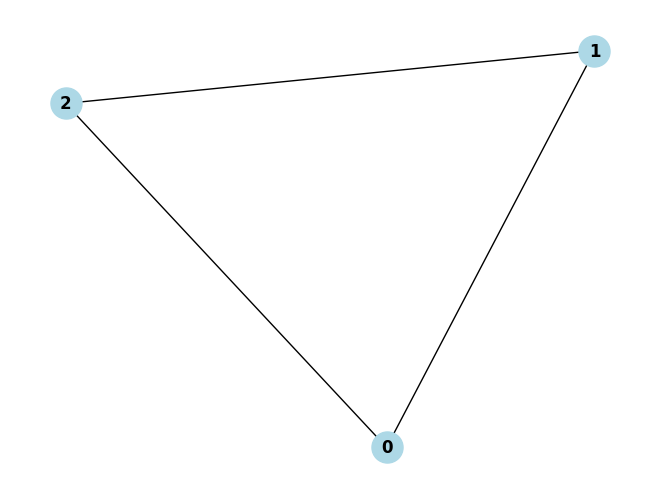

21
----------- 












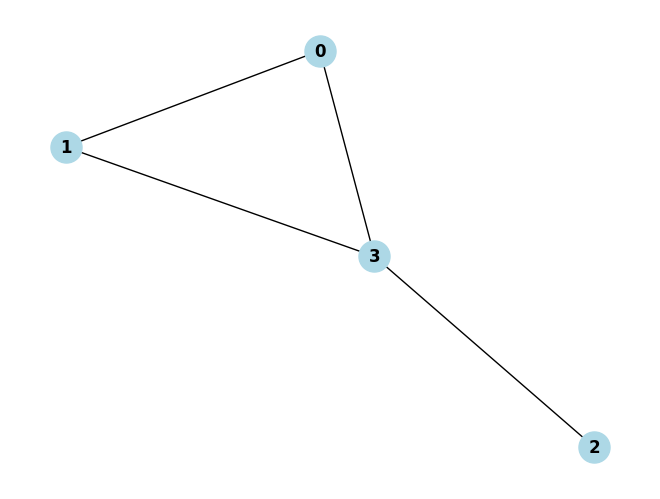

42
----------- 












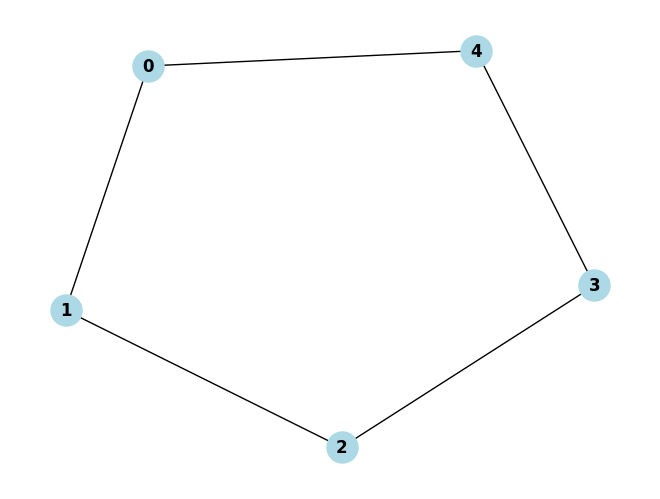

7
----------- 












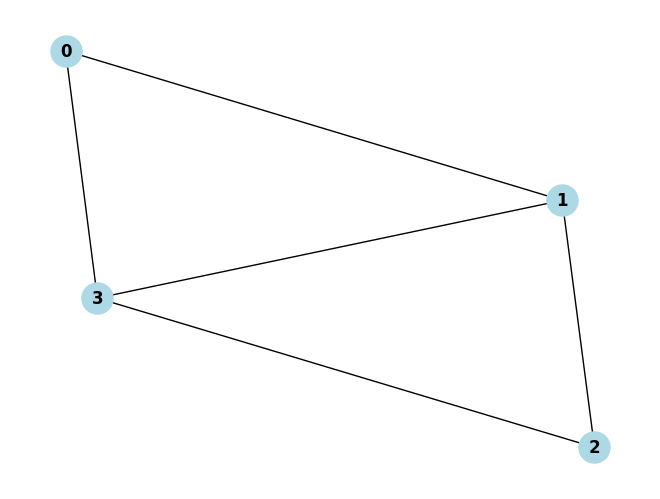

28
----------- 












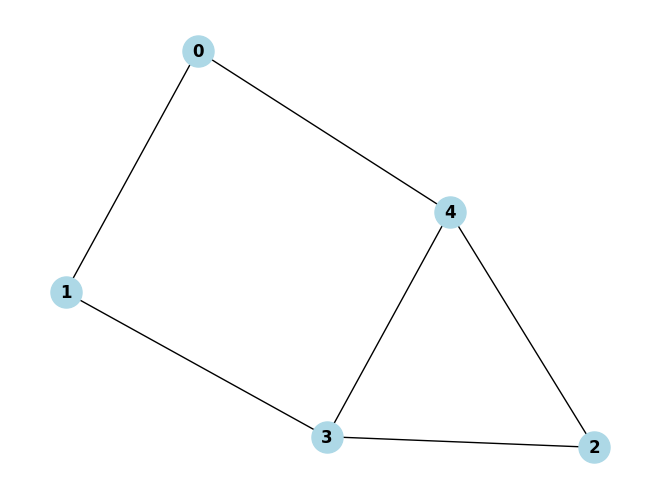

21
----------- 












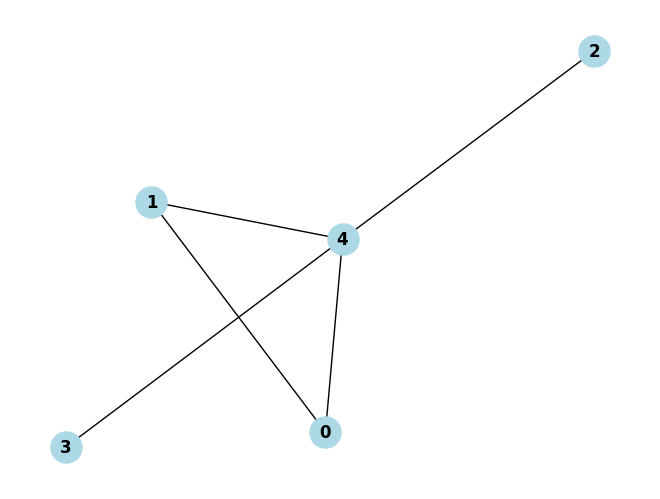

7
----------- 












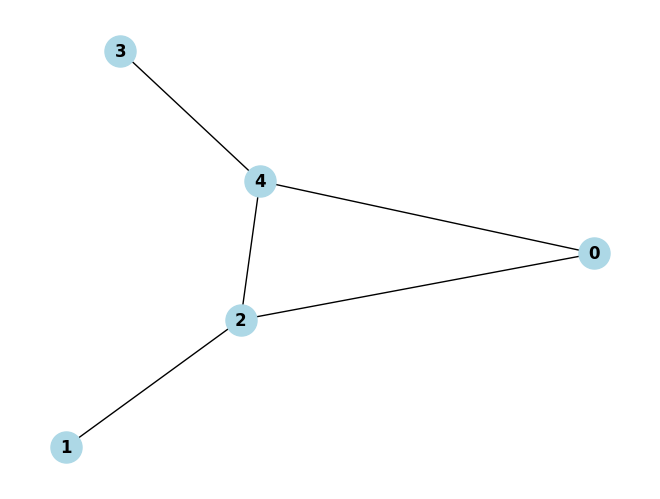

7
----------- 












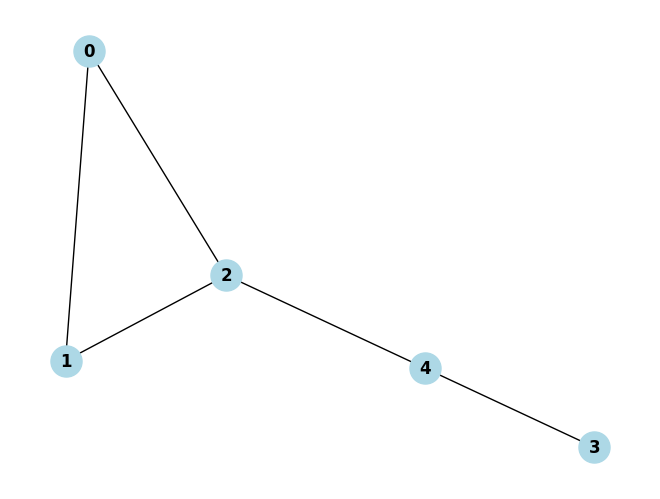

7
----------- 












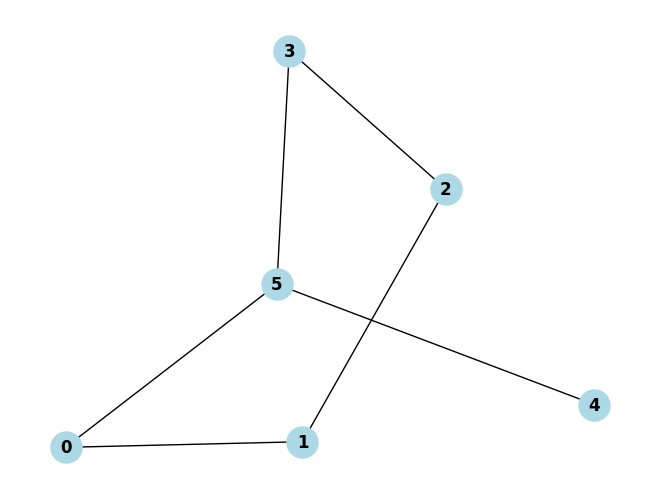

7
----------- 












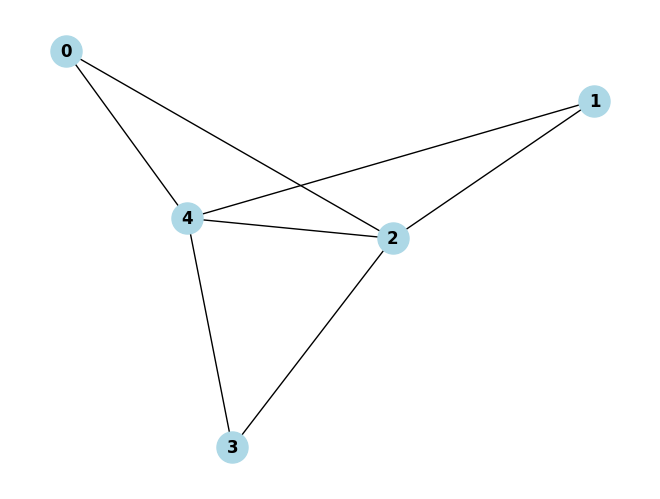

7
----------- 












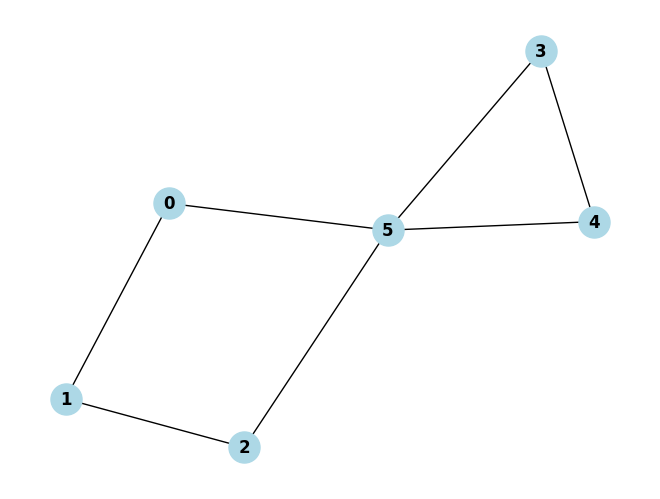

7
----------- 












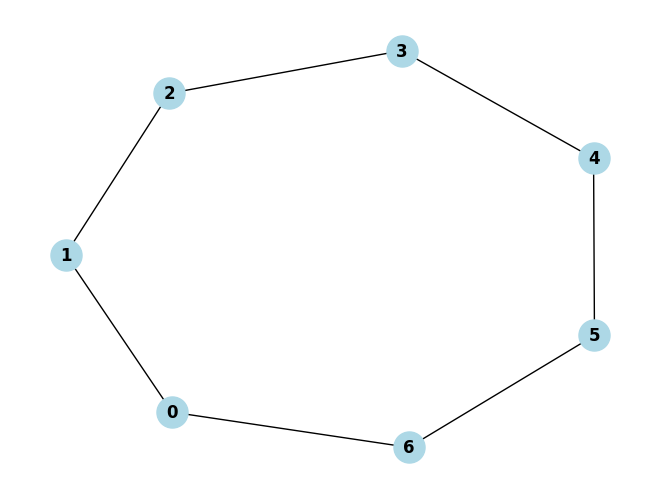

1
----------- 










None


In [6]:
def hom_to_inj(A):
  parts = partition(list(tuple(range(len(A)))))

  parts_list = []
  for part in parts:
    parts_list.append(part)

  parts = parts_list

  i = 0
  quots = []
  while i < len(parts):

    QM = np.zeros((len(parts[i]), len(parts[i])))

    for part1 in parts[i]:
      for part2 in parts[i]:

        if connected(part1,part2, A): # part1 can be equal to part 2 to create loops...
          QM[parts[i].index(part1)][parts[i].index(part2)] = 1
          QM[parts[i].index(part2)][parts[i].index(part1)] = 1

    new = True
    if np.trace(QM) == 0: # This will filter out quotients with self loops which have 0 homomorphisms.

      new_graph = nx.from_numpy_array(np.array(QM))

      for graph in distinct:
        if nx.is_isomorphic(graph, new_graph):
          new = False
          break

      if new == True:
        distinct.append(new_graph)

      mu = 1 # There is no coeff here as we go from hom to inj

      quots.append((new_graph, mu))
      i = i+1
    else:
      i = i+1

  quots_unique = find_isomorphic_pairs(quots)

  for g, v in quots_unique:
    nx.draw(g, with_labels=True, node_color='lightblue', node_size=500, font_weight='bold')
    plt.show()
    print(v)
    print("----------- \n\n\n\n\n\n\n\n\n\n")


# Example with G = C_7.

def path_graph_adjacency(n):
    A = np.zeros((n, n), dtype=int)
    for i in range(n - 1):
        A[i, i + 1] = 1
        A[i + 1, i] = 1
    return A


def adjacency_matrix_cycle(n):
    A = np.zeros((n, n), dtype=int)
    for i in range(n):
        A[i, (i - 1) % n] = 1  # Connect to previous vertex
        A[i, (i + 1) % n] = 1  # Connect to next vertex
    return A

A_C7 = adjacency_matrix_cycle(7)
print(hom_to_inj(A_C7))

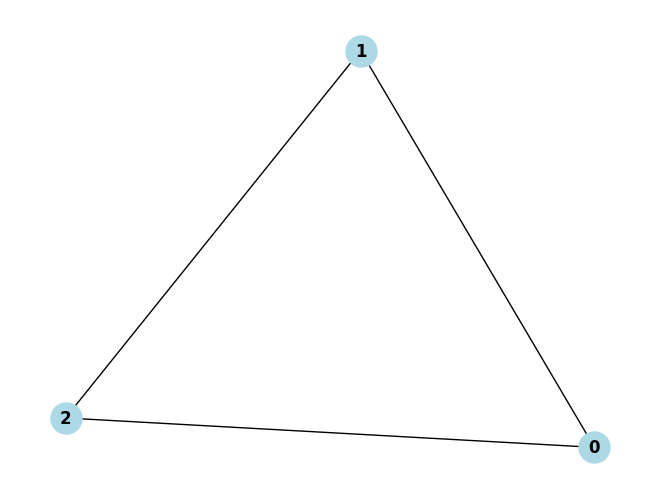

-6
----------- 












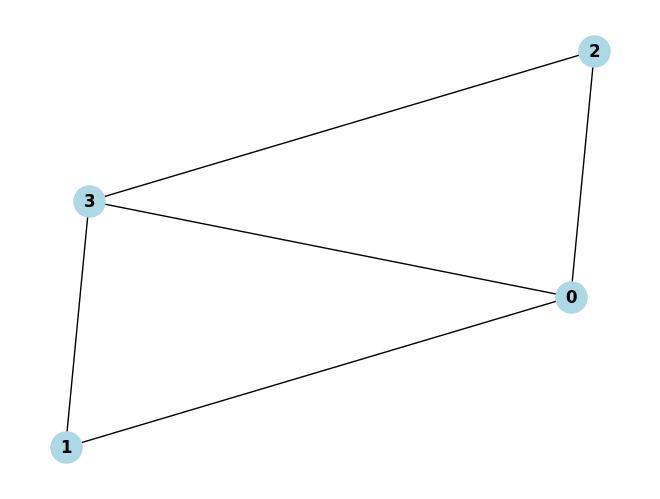

8
----------- 












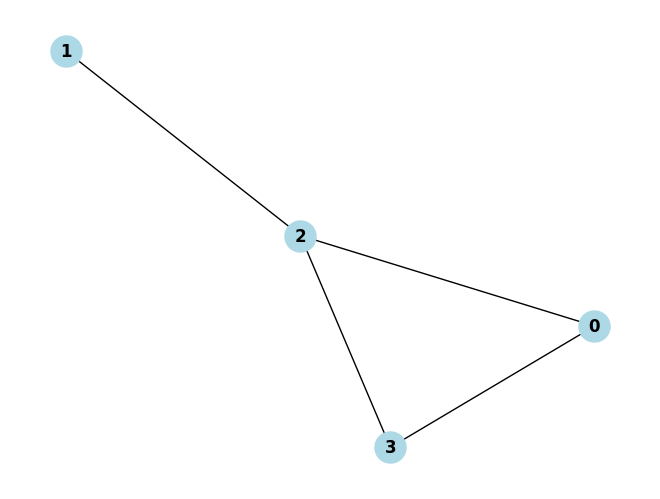

7
----------- 












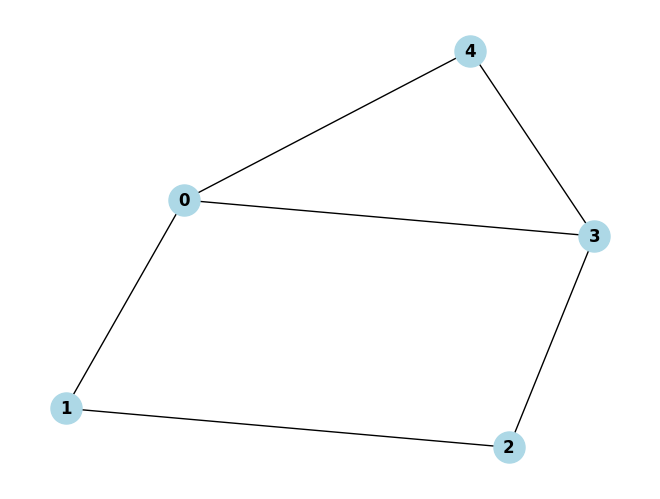

-4
----------- 












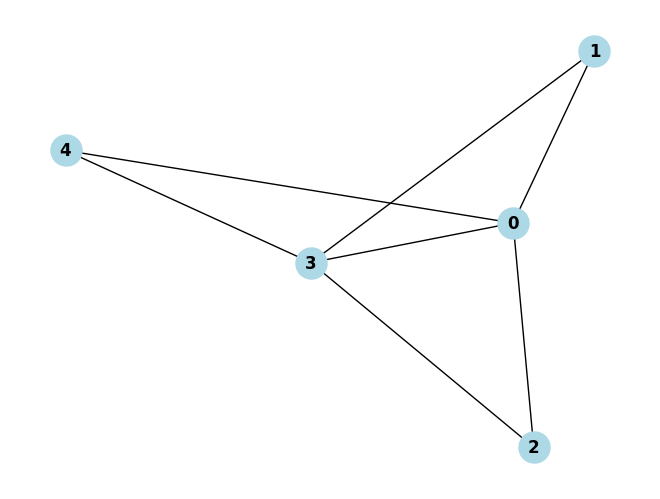

-2
----------- 












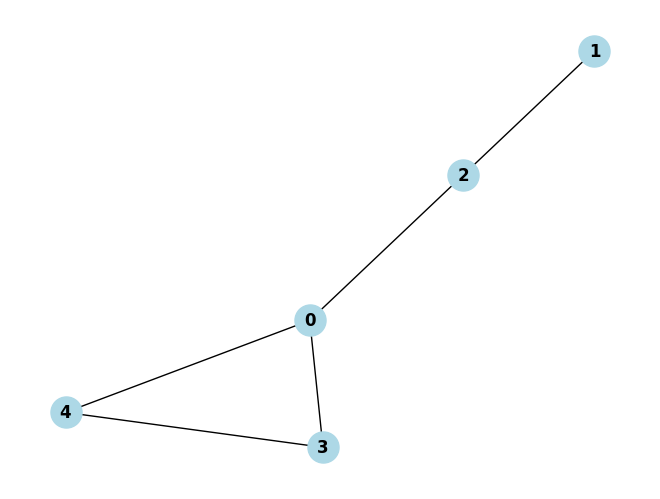

-1
----------- 












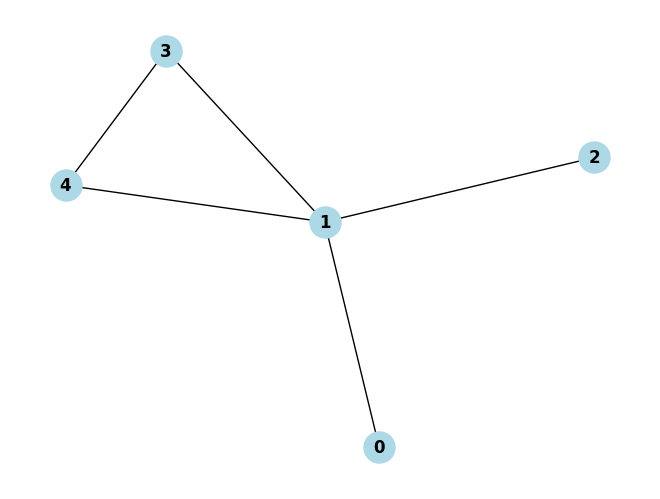

-1
----------- 












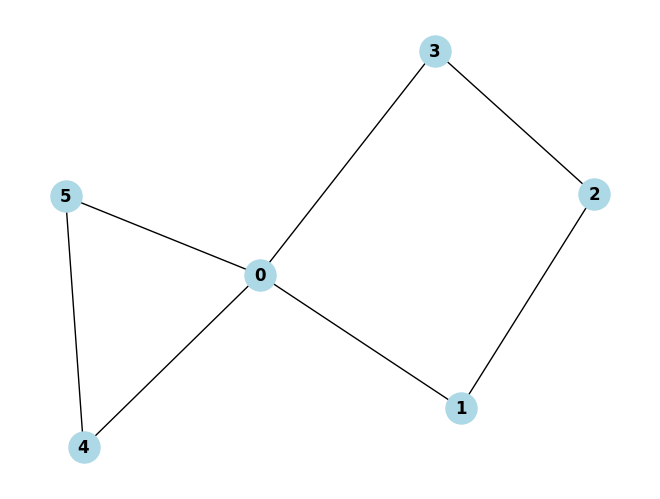

1
----------- 










None


In [8]:
import numpy as np
def inj_to_hom(A):

  parts = partition(list(tuple(range(len(A)))))

  parts_list = []
  for part in parts:
    parts_list.append(part)

  parts = parts_list

  i = 0
  quots = []
  while i < len(parts):

    QM = np.zeros((len(parts[i]), len(parts[i])))

    for part1 in parts[i]:
      for part2 in parts[i]:

        if connected(part1,part2, A): # part1 can be equal to part 2 to create loops...
          QM[parts[i].index(part1)][parts[i].index(part2)] = 1
          QM[parts[i].index(part2)][parts[i].index(part1)] = 1

    new = True
    if np.trace(QM) == 0: # This will filter out quotients with self loops which have 0 homomorphisms.

      new_graph = nx.from_numpy_array(np.array(QM))
      #print(new_graph)
      # ^ Use to find subgraphs that were not found by hand...
      for graph in distinct:
        if nx.is_isomorphic(graph, new_graph):
          new = False
          break

      if new == True:
        distinct.append(new_graph)

      mu = 1
      for part in parts[i]:
        mu = mu * math.factorial((len(part)-1))
        mu = 1

      if len(parts[i]) % 2 != len(A) % 2:
         mu = -mu

      quots.append((new_graph, mu))
      i = i+1
    else:
      i = i+1

  quots_unique = find_isomorphic_pairs(quots)

  for g, v in quots_unique:
    nx.draw(g, with_labels=True, node_color='lightblue', node_size=500, font_weight='bold')
    plt.show()
    print(v)
    print("----------- \n\n\n\n\n\n\n\n\n\n")

def path_graph_adjacency(n):
    A = np.zeros((n, n), dtype=int)
    for i in range(n - 1):
        A[i, i + 1] = 1
        A[i + 1, i] = 1
    return A


# Example when H is the fish graph
n = 6
adj_matrix = np.zeros((n, n), dtype=int)

# Edges for C4: 0–1–2–3–0
edges_c4 = [(0, 1), (1, 2), (2,3), (3, 0)]

# Edges for C3: 0–4–5–0
edges_c3 = [(0, 4), (4, 5), (5, 0)]

# Combine all edges
edges = edges_c4 + edges_c3

# Fill adjacency matrix
for u, v in edges:
    adj_matrix[u, v] = 1
    adj_matrix[v, u] = 1  # since the graph is undirected

print(inj_to_hom(adj_matrix))


This next part attempts to compare for k=7, the N graph with the Bowtie graph.

[(0, 1), (0, 2), (0, 3), (0, 5), (1, 2), (3, 4), (4, 5)]
0


68
18


6.0


0
20160
1680
380 1 380.0
116280 380 306.0
27907200 116280 240.0


---------This is the square----------
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]


r-adjacency eigenval computations


[[0, 1, 1, 0], [1, 0, 1, 1], [1, 1, 0, 0], [0, 1, 0, 0]]
[[[0. 0.]
  [1. 1.]
  [1. 1.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [1. 1.]
  [1. 1.]]

 [[0. 0.]
  [1. 1.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [1. 1.]
  [0. 0.]
  [0. 0.]]]


We have changed approaches and will now use adjacency tensors. The following code will calculate the dth order trace of the r-adjacecncy tensor of a graph G

[[[0.  0.  0. ]
  [0.  0.  0.5]
  [0.  0.5 0. ]]

 [[0.  0.  0.5]
  [0.  0.  0. ]
  [0.5 0.  0. ]]

 [[0.  0.5 0. ]
  [0.5 0.  0. ]
  [0.  0.  0. ]]]
[A00, A01, A02, A03, A10, A11, A12, A13, A20, A21, A22, A23, A30, A31, A32, A33]


The following tries to get nob from hom where nob is the number of non-backtracking homomorphisms

(18, 0, 0)
(66, 6, 0)


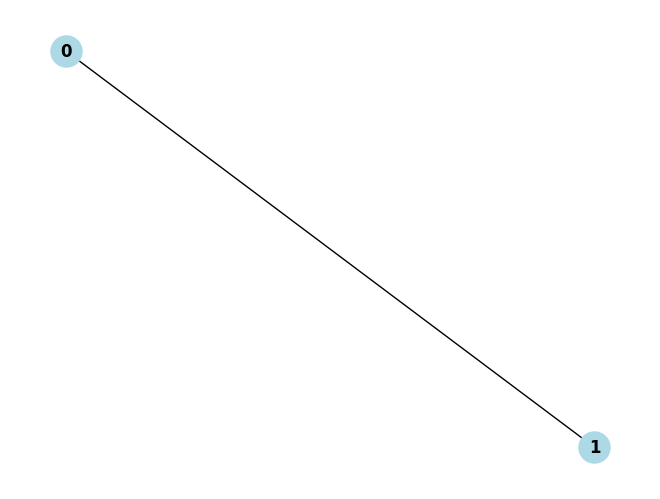

1
-----------
(56, 56, 56)


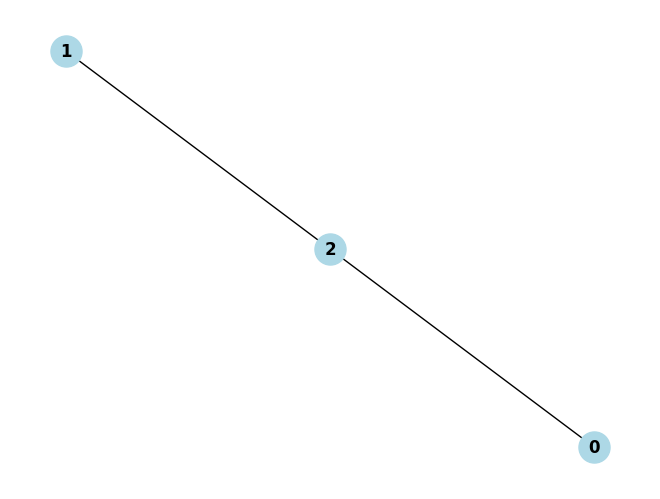

-6
-----------
(392, 336, 336)


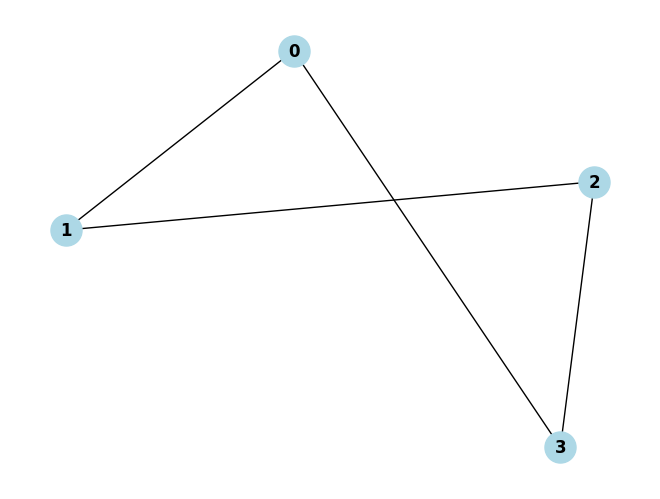

6
-----------
(2408, 1680, 1680)


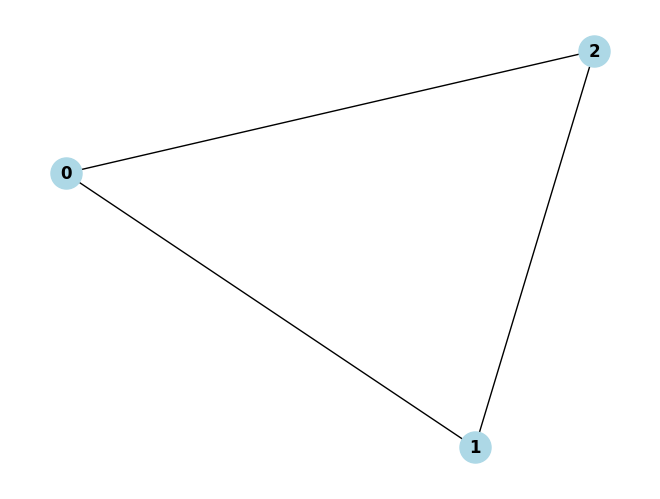

-4
-----------
(336, 336, 336)


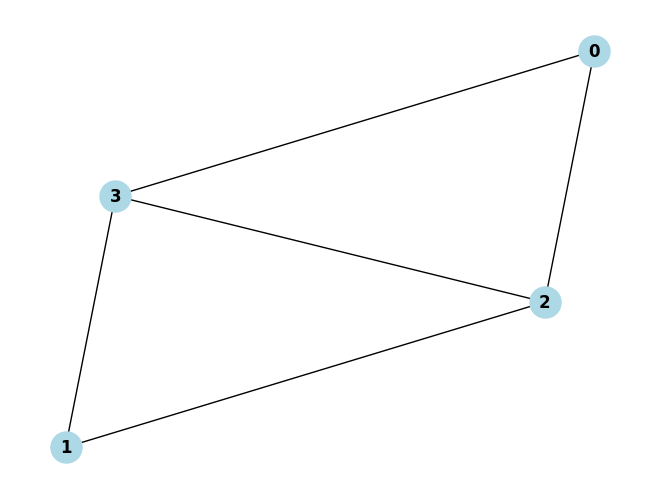

9
-----------
(2016, 1680, 1680)


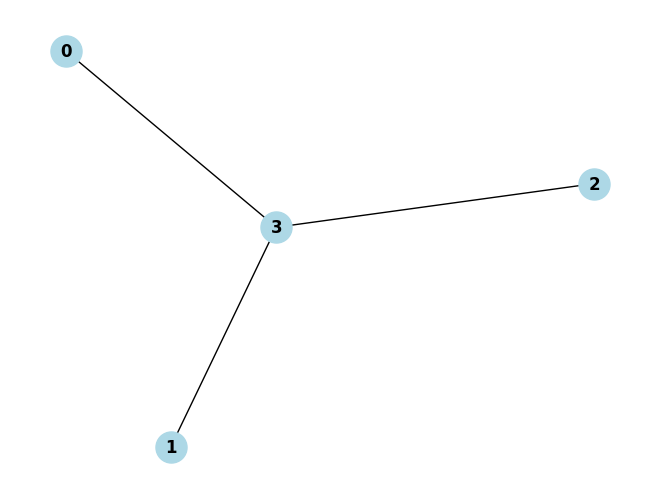

2
-----------
(2744, 1680, 1680)


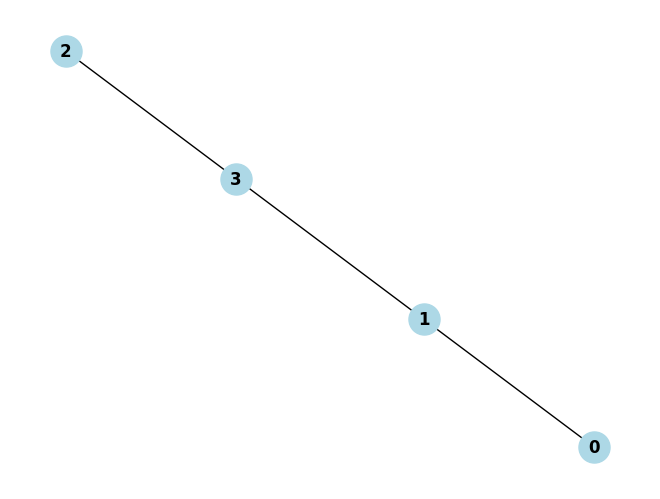

3
-----------
(2744, 2016, 1680)


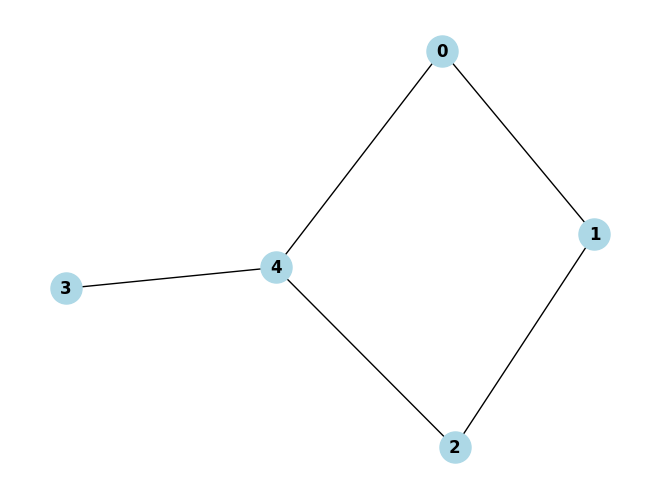

-6
-----------
(16856, 8400, 6720)


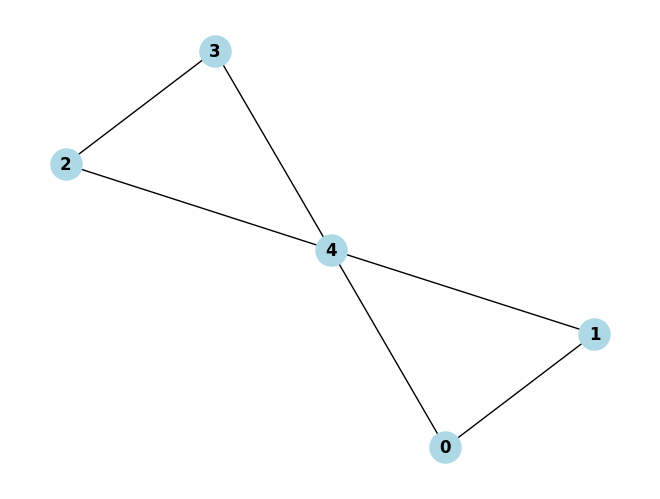

-3
-----------
(14112, 6720, 6720)


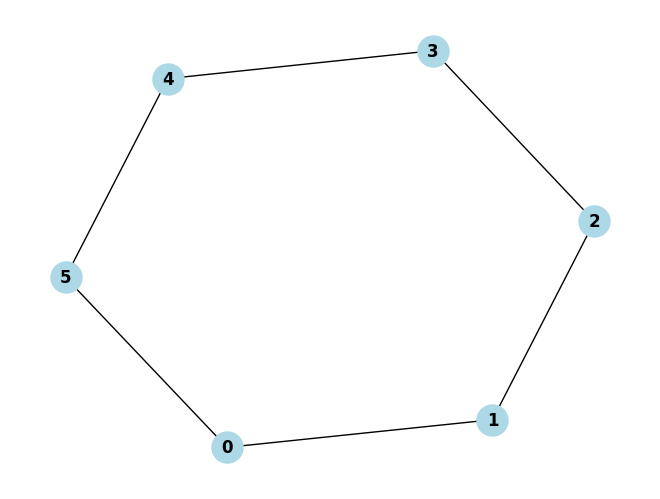

1
-----------
(117656, 45696, 20160)


In [13]:
import numpy as np
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import math

# The previous code will not help as it uses the formulas to go between hom and inj. Here, we will need to explicitly find hom for H --> G and then filter out the backtracking ones...

# Idea is to check every single n-tuple from 1 to m where n = |V_G| and see if it is a valid homomorphism. We can also check if its nonbacktrackign and if its injective.

def hom_nob_inj(H,G,m,n): # m is size of H and n size of G

  tups = list(itertools.product(range(n), repeat=m))

  hom_count = 0
  nob_count = 0
  inj_count = 0

  neighs_H = []

  for i in range(m):
    neighs_i = []

    for j in range(m):
      if H[i][j] == 1:
        neighs_i.append(j)

    neighs_H.append(neighs_i)

  for tup in tups:

    tup_multiplicity = 1

    for i in range(n):
      i_count = 0
      for val in tup:
        if val == i:
          i_count = i_count + 1
      tup_multiplicity = tup_multiplicity * math.factorial(i_count) # This prevents overcounting since 1,4 being sent to 1 is the same as 4,1 being sent to 1

    #if tup == (0, 1, 2, 0,4,3):
                 # print(tup_multiplicity)

    is_hom = True
    is_nob = True
    is_inj = True

    if len(tup) != len(set(tup)):
     # if tup == (0, 1, 2, 0, 4):
            #  print(tup, set(tup))

      is_inj = False
      #if tup == (0, 1, 2, 0,4,3):
            #  print("not inj")

    for i in range(m):
      for j in range(m):

        if H[i][j] == 1:
          if G[tup[i]][tup[j]] != 1:

            is_hom = False
            is_nob = False
            is_inj = False
            #if tup == (0, 1, 2, 0,4):
             # print("not hom")
              # print(i,j)
              # print(H[i][j])
              # print(tup[i], tup[j])
              # print(G[tup[i]][tup[j]])

    if is_hom and not is_inj:
      for i in range(m):
        for j in neighs_H[i]:
          for k in neighs_H[i]:

            if j != k:
              if tup[j] == tup[k]:
                is_nob = False
                #if tup == (0, 1, 2, 0,4,3):
                 # print(tup_multiplicity)
                  # print("not nob")
                  # print(i,j,k)
                  # print(H[i][j])
                  # print(H[i][k])
                  # print(tup[j],tup[k])

    if is_hom:
      hom_count = hom_count + 1#/tup_multiplicity
    if is_nob:
      nob_count = nob_count + 1#/tup_multiplicity
    if is_inj:
      inj_count = inj_count + 1#/tup_multiplicity

  return (hom_count, nob_count, inj_count)

A = [[0, 1, 1], [1, 0, 1], [1, 1, 0]]

B = [[0, 1, 1, 1], [1, 0, 1, 1], [1, 1, 0, 1], [1,1,1,0]]

#print(hom_nob_inj(B,A,4,3))

#print(hom_nob_inj(A,B,3,4))

H = [[0, 1, 0, 0, 1],
    [1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 1, 0, 1],
    [1, 0, 0, 1, 0]]

G = [[0, 1, 1, 1, 1, 1, 1, 1],
 [1, 0, 1, 1, 1, 1, 1, 1],
 [1, 1, 0, 1, 1, 1, 1, 1],
 [1, 1, 1, 0, 1, 1, 1, 1],
 [1, 1, 1, 1, 0, 1, 1, 1],
 [1, 1, 1, 1, 1, 0, 1, 1],
 [1, 1, 1, 1, 1, 1, 0, 1],
 [1, 1, 1, 1, 1, 1, 1, 0]]

#print(hom_nob_inj(H,G,5,8))

K = [[0, 1, 1, 0], [1, 0, 1, 1],[1, 1, 0, 1], [0,1,1,0]]
B = [[0, 1, 1, 1, 1], [1, 0, 1, 0,0],[1, 1, 0,0,0], [1, 0, 0, 0, 1],[1, 0, 0, 1, 0]]
#print(hom_nob_inj(K,B,4,5))
#print(hom_nob_inj(B,K,5,4))

T = [[0,1,1,0,1], [1,0,1,0,0], [1,1,0,1,0],[0,0,1,0,1],[1,0,0,1,0]]
#print(hom_nob_inj(H, T, 5,5))

C6 = [[0, 1, 0, 0, 0, 1],
 [1, 0, 1, 0, 0, 0],
 [0, 1, 0, 1, 0, 0],
 [0, 0, 1, 0, 1, 0],
 [0, 0, 0, 1, 0, 1],
 [1, 0, 0, 0, 1, 0]]

#G = [[0,1,1,1,1], [1, 0, 1, 0, 0], [1, 1, 0, 1, 0], [1, 0, 1, 0, 1], [1, 0, 0, 1, 0]]
#print(hom_nob_inj(C6, G, 6, 5))

T = [[0,1,1],[1,0,1],[1,1,0]]
S = [[0, 1, 0, 1],
 [1, 0, 1, 0],
 [0, 1, 0, 1],
 [1, 0, 1, 0]]

print(hom_nob_inj(S, T, 4, 3))
print(hom_nob_inj(C6, T, 6, 3))

# THE FOLLOWING IS COPY PASTE FROM ABOVE

def partition(collection):
    if len(collection) == 1:
        yield [ collection ]
        return

    first = collection[0]
    for smaller in partition(collection[1:]):
        # insert `first` in each of the subpartition's subsets
        for n, subset in enumerate(smaller):
            yield smaller[:n] + [[ first ] + subset]  + smaller[n+1:]
        # put `first` in its own subset
        yield [ [ first ] ] + smaller

def is_one_away_modulo_k(list1, list2, k): # THIS ONLY WORKS IF HOM(C_k, G).
    # Check if there exists a pair satisfying the condition
    for num1 in list1:
        for num2 in list2:
            if (num1 + 1) % k == num2 or (num1 - 1) % k == num2:
                return True

    # If no such pair is found, return False
    return False

def connected(list1, list2, A):

  for num1 in list1:
    for num2 in list2:

      if A[num1][num2] == 1 or A[num2][num1] == 1:
        return True

  return False

# Example usage:
# list1 = [1, 2, 3, 4]
# list2 = [2, 3, 4, 5]
# k = 5
# result = is_one_away_modulo_k(list1, list2, k)
# print(result)

def find_isomorphic_pairs(graph_list):
    isomorphic_dict = {}  # To store isomorphic graphs and their corresponding sum of integers

    for g, value in graph_list:
        isomorphic_found = False

        for key in isomorphic_dict:
            if nx.is_isomorphic(g, key):
                isomorphic_dict[key] += value
                isomorphic_found = True
                break

        if not isomorphic_found:
            isomorphic_dict[g] = value

    result_list = list(isomorphic_dict.items())
    return result_list

# Example usage:
# graph_list = [(nx.path_graph(3), 10), (nx.cycle_graph(3), 5), (nx.path_graph(3), 20), (nx.complete_graph(3), 8)]

# result = find_isomorphic_pairs(graph_list)
# print(result)

k = 6

distinct = []
EM = np.zeros((k,k))

for i in range(k): # This makes the cycle
  for j in range(k):
    if (i-j)%k == 1:
      EM[i][j] = 1
      EM[j][i] = 1

parts = partition(list(tuple(range(k))))
parts_list = []
for part in parts:
  parts_list.append(part)

parts = parts_list
i = 0
quots = []
while i < len(parts):

  QM = np.zeros((len(parts[i]), len(parts[i])))

  for part1 in parts[i]:
    for part2 in parts[i]:

      if is_one_away_modulo_k(part1,part2,k): # part1 can be equal to part 2 to create loops...
        QM[parts[i].index(part1)][parts[i].index(part2)] = 1
        QM[parts[i].index(part2)][parts[i].index(part1)] = 1

  new = True
  if np.trace(QM) == 0 and np.diagonal(QM).all() == 0: # This will filter out quotients with self loops which have 0 homomorphisms.

    new_graph = nx.from_numpy_array(np.array(QM))
    #print(new_graph)
    # ^ Use to find subgraphs that were not found by hand...
    for graph in distinct:
      if nx.is_isomorphic(graph, new_graph):
        new = False
        break

    if new == True:
      distinct.append(new_graph)

    mu = 1
    for part in parts[i]:
      # mu = mu * math.factorial((len(part)-1))
      mu=1

    if len(parts[i]) % 2 != k % 2:
      mu = -mu

    quots.append((new_graph, mu))
    #print(parts[i])
    i = i+1
  else:
    i = i+1

quots_unique = find_isomorphic_pairs(quots)

for g, v in quots_unique:
  nx.draw(g, with_labels=True, node_color='lightblue', node_size=500, font_weight='bold')
  plt.show()
  print(v)
  print("-----------")

  g = nx.to_numpy_array(g)

  print(hom_nob_inj(np.array(g), G, len(g), 8))

The following code is mostly copy paste from the earlier code but modifies the function 'is_modulo_one_away' to two away to be able to get a formula for the nonbacktracking. changes hom_to_inj to nob_to_inj

---



[[[0], [1, 4], [2, 5], [3, 6]], [[1], [0, 4], [2, 5], [3, 6]], [[0], [1], [4], [2, 5], [3, 6]], [[0], [2], [1, 4], [5], [3, 6]], [[2], [0, 4], [1, 5], [3, 6]], [[0], [2], [4], [1, 5], [3, 6]], [[1], [2], [0, 4], [5], [3, 6]], [[0], [1], [2], [4], [5], [3, 6]], [[0, 3], [1, 4], [2, 5], [6]], [[0], [3], [1, 4], [2, 5], [6]], [[1], [0, 3], [4], [2, 5], [6]], [[1], [3], [0, 4], [2, 5], [6]], [[0], [1], [3], [4], [2, 5], [6]], [[0, 3], [1, 4], [5], [2, 6]], [[0], [3], [1, 4], [5], [2, 6]], [[0, 3], [4], [1, 5], [2, 6]], [[3], [0, 4], [1, 5], [2, 6]], [[0], [3], [4], [1, 5], [2, 6]], [[1], [0, 3], [4], [5], [2, 6]], [[1], [3], [0, 4], [5], [2, 6]], [[0], [1], [3], [4], [5], [2, 6]], [[2], [0, 3], [1, 4], [5], [6]], [[0], [2], [3], [1, 4], [5], [6]], [[2], [0, 3], [4], [1, 5], [6]], [[2], [3], [0, 4], [1, 5], [6]], [[0], [2], [3], [4], [1, 5], [6]], [[1], [2], [0, 3], [4], [5], [6]], [[1], [2], [3], [0, 4], [5], [6]], [[0], [1], [2], [3], [4], [5], [6]]]
[[0], [1, 4], [2, 5], [3, 6]]
[[1], [0

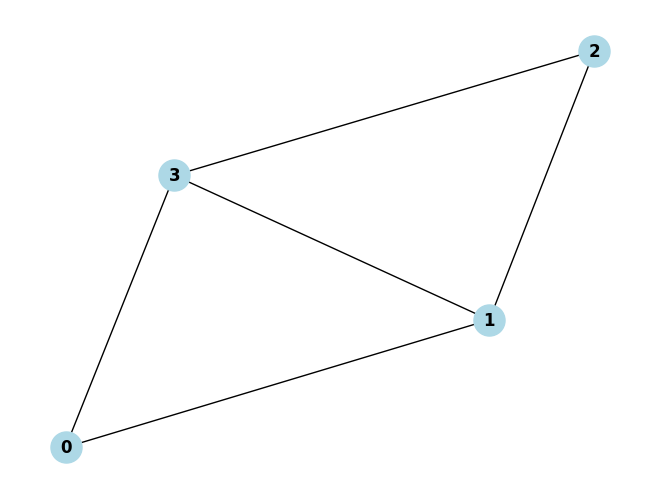

7
----------- 












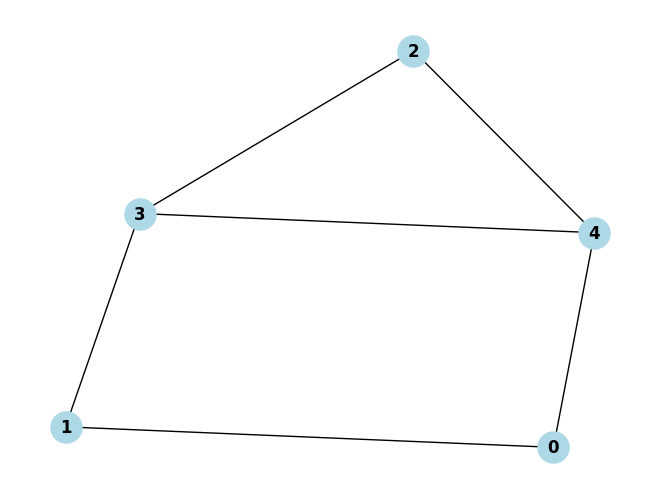

7
----------- 












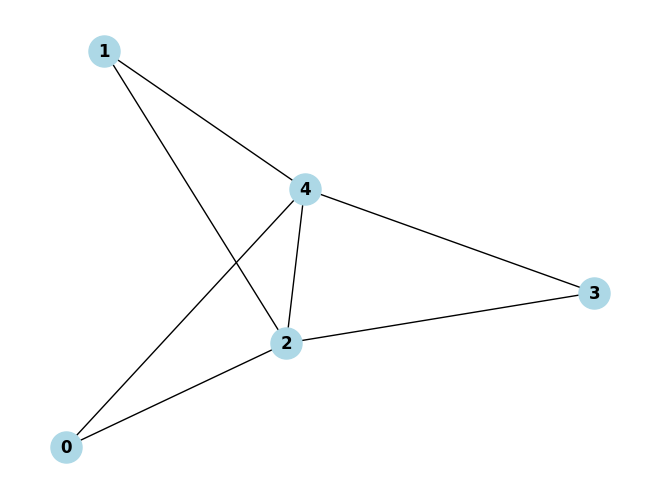

7
----------- 












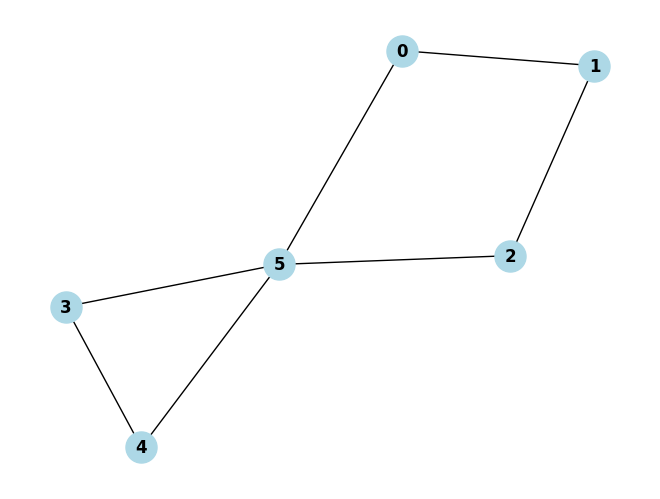

7
----------- 












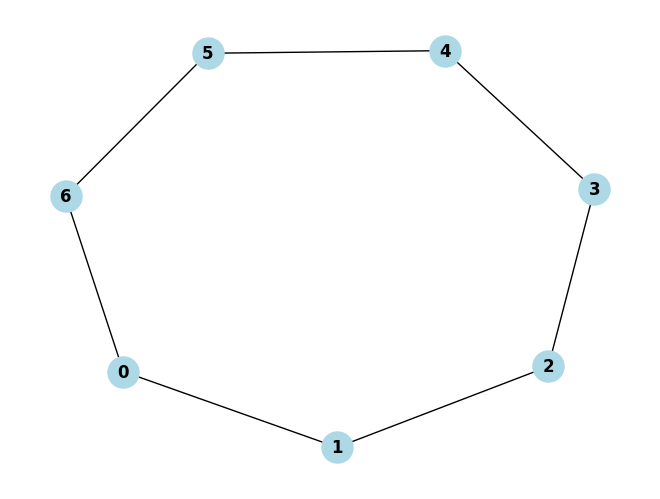

1
----------- 










None


In [ ]:
import networkx as nx

def is_valid_part(part, A):
  for subset in part:
    for i in subset:
      for j in subset:

        #if (abs(i-j) % (len(A) + 1) <= 2 or abs(i-j) % (len(A) + 1) >= len(A) - 2) and i != j:

        if (nx.common_neighbors(nx.Graph(A),i,j) != set()) or ():
          return False

  return True

def is_valid_subset(subset,A):

  G = nx.from_numpy_array(np.array(A))

  #print(subset)
  for i in subset:
    for j in subset:

      #print(i, j, nx.common_neighbors(G,i,j))

      #if (abs(i-j) % (len(A)) <= 2 or abs(i-j) % (len(A) + 1) >= len(A) - 2) and i != j:

      if (i!= j and nx.common_neighbors(G,i,j) != set()) or G.has_edge(i,j):

        return False
  return True

def connected(list1, list2, A):

  for num1 in list1:
    for num2 in list2:

      if A[num1][num2] == 1 or A[num2][num1] == 1:
        return True

  return False

def nob_to_inj(A):
  parts = partition(list(tuple(range(len(A)))))

  parts_list = []
  for part in parts:
    valid = True
    for subset in part:

      if not is_valid_subset(subset, A):
        valid = False

    if valid:
      parts_list.append(part)
      if part == [[0],[1],[2,4],[3],[5]]:
        print('here')

  parts = parts_list
  print(parts)
  for part in parts:
    if len(part)==4:
      print(part)

  i = 0
  quots = []
  while i < len(parts):

    QM = np.zeros((len(parts[i]), len(parts[i])))

    for part1 in parts[i]:
      for part2 in parts[i]:

        if connected(part1,part2, A) and part1 != part2: # part1 can be equal to part 2 to create loops...

            QM[parts[i].index(part1)][parts[i].index(part2)] = 1
            QM[parts[i].index(part2)][parts[i].index(part1)] = 1

    new = True
    if np.trace(QM) == 0: # This will filter out quotients with self loops which have 0 homomorphisms.

      new_graph = nx.from_numpy_array(np.array(QM))
      #print(new_graph)
      # ^ Use to find subgraphs that were not found by hand...
      for graph in distinct:
        if nx.is_isomorphic(graph, new_graph):
          new = False
          break

      if new == True:
        distinct.append(new_graph)

      mu = 1 # There is no coeff here as we go from hom to inj

      quots.append((new_graph, mu))
      #print(parts[i])
      i = i+1
    else:
      i = i+1

  quots_unique = find_isomorphic_pairs(quots)

  for g, v in quots_unique:
    nx.draw(g, with_labels=True, node_color='lightblue', node_size=500, font_weight='bold')
    plt.show()
    print(v)
    print("----------- \n\n\n\n\n\n\n\n\n\n")

C7 = [
    [0, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 1, 0]
]

C6 = [
[0, 1, 0, 0, 0, 1],
[1, 0, 1, 0, 0, 0],
[0, 1, 0, 1, 0, 0],
[0, 0, 1, 0, 1, 0],
[0, 0, 0, 1, 0, 1],
[1, 0, 0, 0, 1, 0]
]

print(nob_to_inj(C7))

[[[0], [1, 4], [2, 5], [3, 6]], [[1], [0, 4], [2, 5], [3, 6]], [[0], [1], [4], [2, 5], [3, 6]], [[0], [2], [1, 4], [5], [3, 6]], [[2], [0, 4], [1, 5], [3, 6]], [[0], [2], [4], [1, 5], [3, 6]], [[1], [2], [0, 4], [5], [3, 6]], [[0], [1], [2], [4], [5], [3, 6]], [[0, 3], [1, 4], [2, 5], [6]], [[0], [3], [1, 4], [2, 5], [6]], [[1], [0, 3], [4], [2, 5], [6]], [[1], [3], [0, 4], [2, 5], [6]], [[0], [1], [3], [4], [2, 5], [6]], [[0, 3], [1, 4], [5], [2, 6]], [[0], [3], [1, 4], [5], [2, 6]], [[0, 3], [4], [1, 5], [2, 6]], [[3], [0, 4], [1, 5], [2, 6]], [[0], [3], [4], [1, 5], [2, 6]], [[1], [0, 3], [4], [5], [2, 6]], [[1], [3], [0, 4], [5], [2, 6]], [[0], [1], [3], [4], [5], [2, 6]], [[2], [0, 3], [1, 4], [5], [6]], [[0], [2], [3], [1, 4], [5], [6]], [[2], [0, 3], [4], [1, 5], [6]], [[2], [3], [0, 4], [1, 5], [6]], [[0], [2], [3], [4], [1, 5], [6]], [[1], [2], [0, 3], [4], [5], [6]], [[1], [2], [3], [0, 4], [5], [6]], [[0], [1], [2], [3], [4], [5], [6]]]


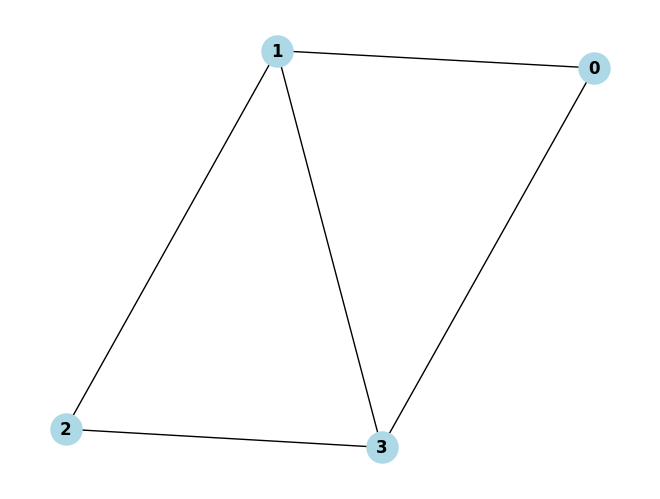

-7
----------- 












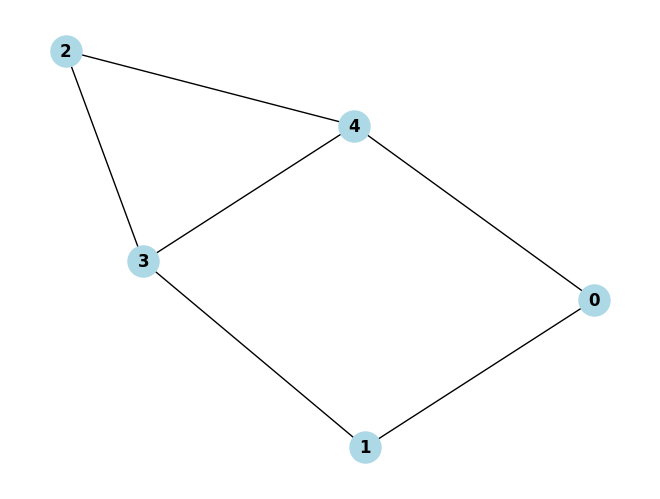

7
----------- 












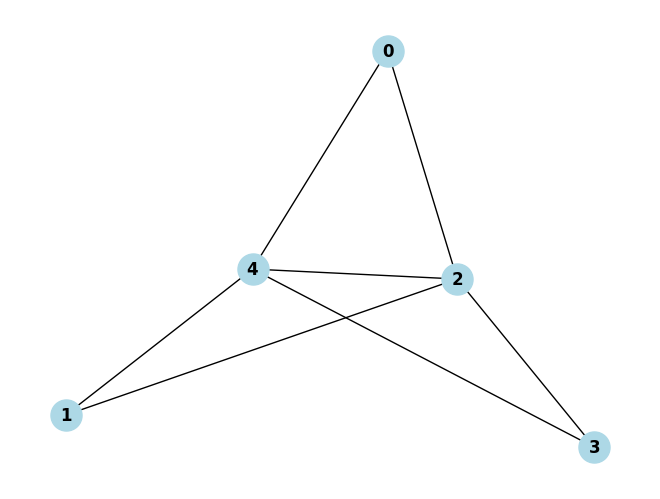

7
----------- 












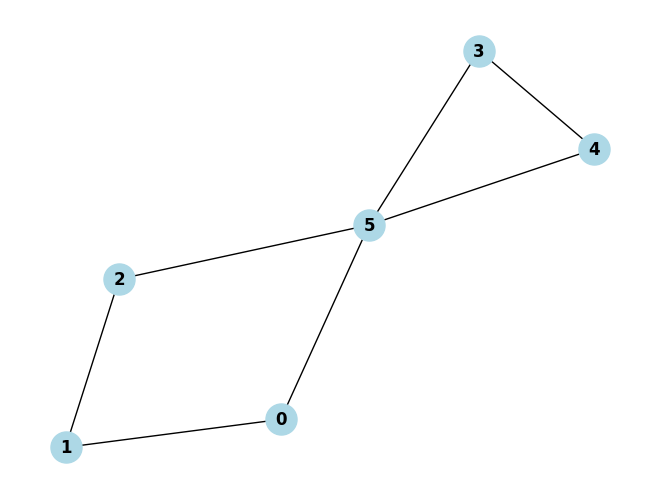

-7
----------- 












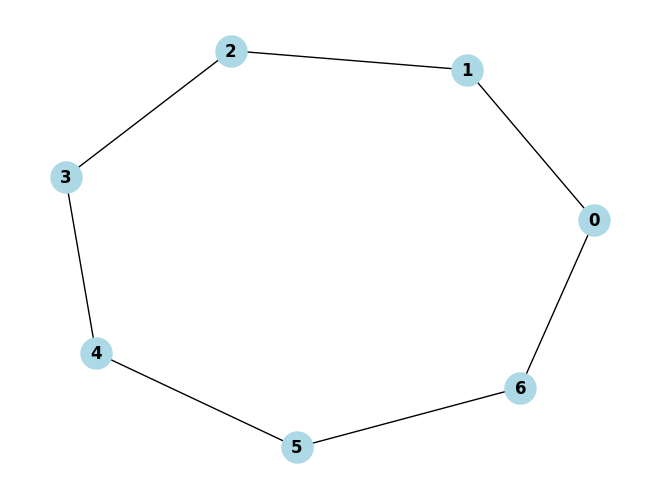

1
----------- 










None


In [ ]:
def inj_to_nob(A):
  parts = partition(list(tuple(range(len(A)))))

  parts_list = []
  for part in parts:
    valid = True
    for subset in part:

      if not is_valid_subset(subset, A):
        valid = False

    if valid:
      parts_list.append(part)
      #if part == [[0],[1],[2,4],[3],[5]]:
        #print('here')

  parts = parts_list
  print(parts)
  #for part in parts:
    #if len(part)==4:
      #print(part)

  i = 0
  quots = []
  while i < len(parts):

    QM = np.zeros((len(parts[i]), len(parts[i])))

    for part1 in parts[i]:
      for part2 in parts[i]:

        if connected(part1,part2, A) and part1 != part2: # part1 can be equal to part 2 to create loops...

            QM[parts[i].index(part1)][parts[i].index(part2)] = 1
            QM[parts[i].index(part2)][parts[i].index(part1)] = 1

    new = True
    if np.trace(QM) == 0: # This will filter out quotients with self loops which have 0 homomorphisms.

      new_graph = nx.from_numpy_array(np.array(QM))
      #print(new_graph)
      # ^ Use to find subgraphs that were not found by hand...
      for graph in distinct:
        if nx.is_isomorphic(graph, new_graph):
          new = False
          break

      if new == True:
        distinct.append(new_graph)

      mu = 1 # There is no coeff here as we go from hom to inj

      for part in parts[i]:
        mu = mu * math.factorial((len(part)-1))

      if len(parts[i]) % 2 != len(A) % 2:
        mu = -mu

      quots.append((new_graph, mu))
      #print(parts[i])
      i = i+1
    else:
      i = i+1

  quots_unique = find_isomorphic_pairs(quots)

  for g, v in quots_unique:
    nx.draw(g, with_labels=True, node_color='lightblue', node_size=500, font_weight='bold')
    plt.show()
    print(v)
    print("----------- \n\n\n\n\n\n\n\n\n\n")

C7 = [
    [0, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 1, 0]
]

C6 = [
[0, 1, 0, 0, 0, 1],
[1, 0, 1, 0, 0, 0],
[0, 1, 0, 1, 0, 0],
[0, 0, 1, 0, 1, 0],
[0, 0, 0, 1, 0, 1],
[1, 0, 0, 0, 1, 0]
]

#print(inj_to_nob(C7))

print(inj_to_nob(C7))

#minus_e = [[0,1,1,1],[1,0,1,1],[1,1,0,0],[1,1,0,0]]

#print(nob_to_inj(minus_e))

#house = [[0,1,1,0,0],[1,0,1,1,0],[1,1,0,0,1],[0,1,0,0,1],[0,0,1,1,0]]

#print(nob_to_inj(house))

#tri_square_glue = [[0,1,1,0,0,0],[1,0,1,0,0,0],[1,1,0,1,0,1],[0,0,1,0,1,0],[0,0,0,1,0,1],[0,0,1,0,1,0]]

#print(nob_to_inj(tri_square_glue))

#M = [[0,1,1,1,1],[1,0,1,1,1],[1,1,0,0,0],[1,1,0,0,0],[1,1,0,0,0]]

#print(nob_to_inj(M))

Non-$(k-1)$-tracking matrix

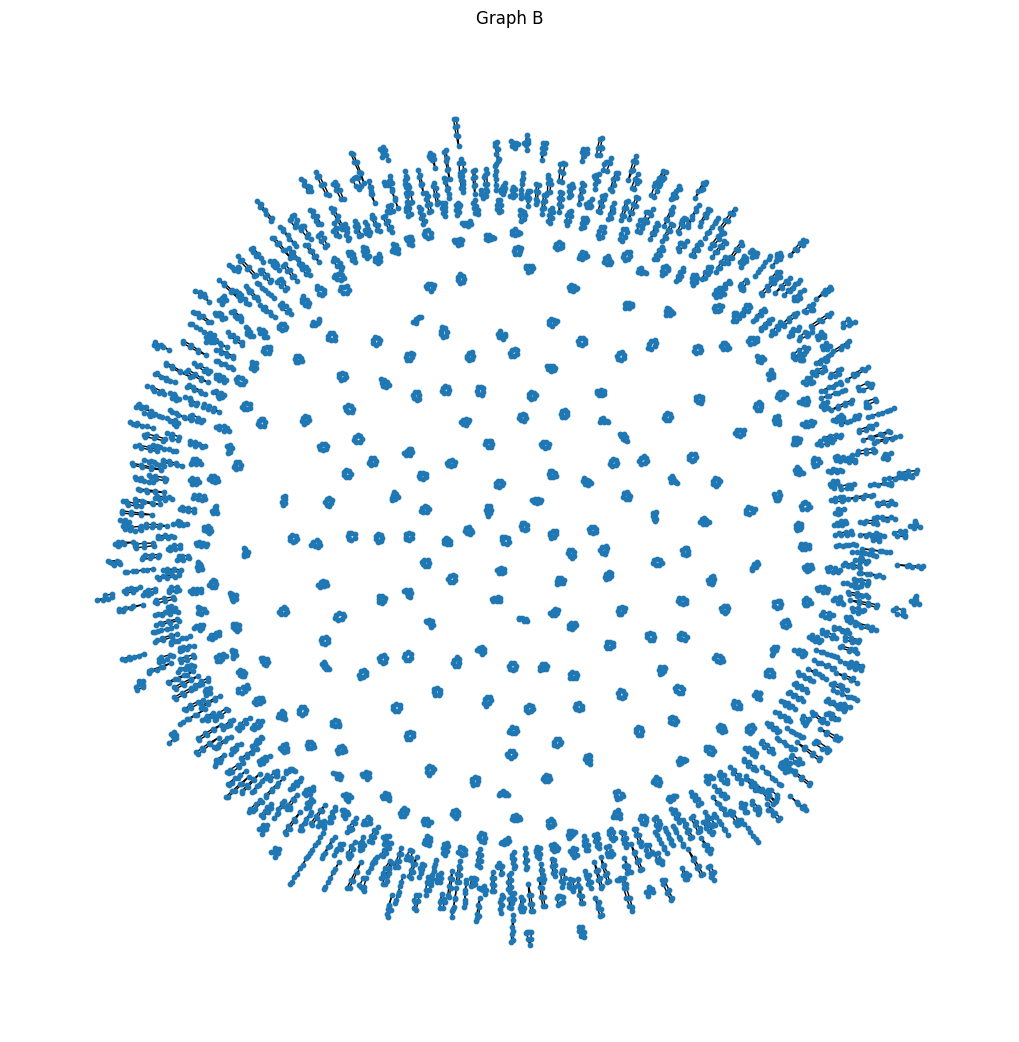

Number of nodes: 5040
Number of edges: 5040


In [ ]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt

# Define the adjacency matrix of K_7
adjacency_matrix = [
    [0, 1, 1, 1, 1, 1, 1],
    [1, 0, 1, 1, 1, 1, 1],
    [1, 1, 0, 1, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 1, 0, 1, 1],
    [1, 1, 1, 1, 1, 0, 1],
    [1, 1, 1, 1, 1, 1, 0]
]

# Generate all possible paths of length 6 in K_7
nodes = range(7)
all_paths = list(itertools.permutations(nodes, 6))

# Create the graph B
B = nx.Graph()

# Add nodes to B
for path in all_paths:
    B.add_node(path)

# Add edges based on the conditions
for path1 in B.nodes():
    for path2 in B.nodes():
        if (path1[0] == path2[5] and
            path1[1] != path2[0] and path1[1] != path2[1] and path1[1] != path2[2] and path1[1] != path2[3] and path1[1] != path2[4] and
            path1[2] != path2[1] and path1[2] != path2[2] and path1[2] != path2[3] and path1[2] != path2[4] and
            path1[3] != path2[2] and path1[3] != path2[3] and path1[3] != path2[4] and
            path1[4] != path2[3] and path1[4] != path2[4] and
            path1[5] != path2[4]):
            B.add_edge(path1, path2)

#Draw and display the graph B
pos = nx.spring_layout(B)  # Positions for all nodes

plt.figure(figsize=(10, 10))
nx.draw(B, pos, with_labels=False, node_size=10)
plt.title('Graph B')
plt.show()

# Print number of nodes and edges in B
print("Number of nodes:", B.number_of_nodes())
print("Number of edges:", B.number_of_edges())

Now for $K_{d,d}$

In [ ]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt

# Generate all possible paths of length 7 in K_{4,4}
nodes_1 = range(4)  # nodes of first partition
nodes_2 = range(4, 8)  # nodes of second partition
all_paths = list(itertools.product(nodes_1, nodes_2, repeat=6))

# Filter paths of length 7
all_paths = [(path[0],) + path[1:] for path in all_paths]

# Create the graph B for K_{4,4}
B = nx.Graph()

# Add nodes to B
for path in all_paths:
    B.add_node(path)

# Add edges based on the conditions
for path1 in B.nodes():
    for path2 in B.nodes():
        if (path1[0] == path2[6] and
            path1[1] != path2[0] and path1[1] != path2[1] and path1[1] != path2[2] and path1[1] != path2[3] and path1[1] != path2[4] and path1[1] != path2[5] and
            path1[2] != path2[1] and path1[2] != path2[2] and path1[2] != path2[3] and path1[2] != path2[4] and path1[2] != path2[5] and
            path1[3] != path2[2] and path1[3] != path2[3] and path1[3] != path2[4] and path1[3] != path2[5] and
            path1[4] != path2[3] and path1[4] != path2[4] and path1[4] != path2[5] and
            path1[5] != path2[4] and path1[5] != path2[5] and
            path1[6] != path2[5]):
            B.add_edge(path1, path2)

# Draw and display the graph B
pos = nx.spring_layout(B)  # Positions for all nodes

plt.figure(figsize=(10, 10))
nx.draw(B, pos, with_labels=False, node_size=10)
plt.title('Graph B for K_{4,4}')
plt.show()

# Print number of nodes and edges in B
print("Number of nodes:", B.number_of_nodes())
print("Number of edges:", B.number_of_edges())


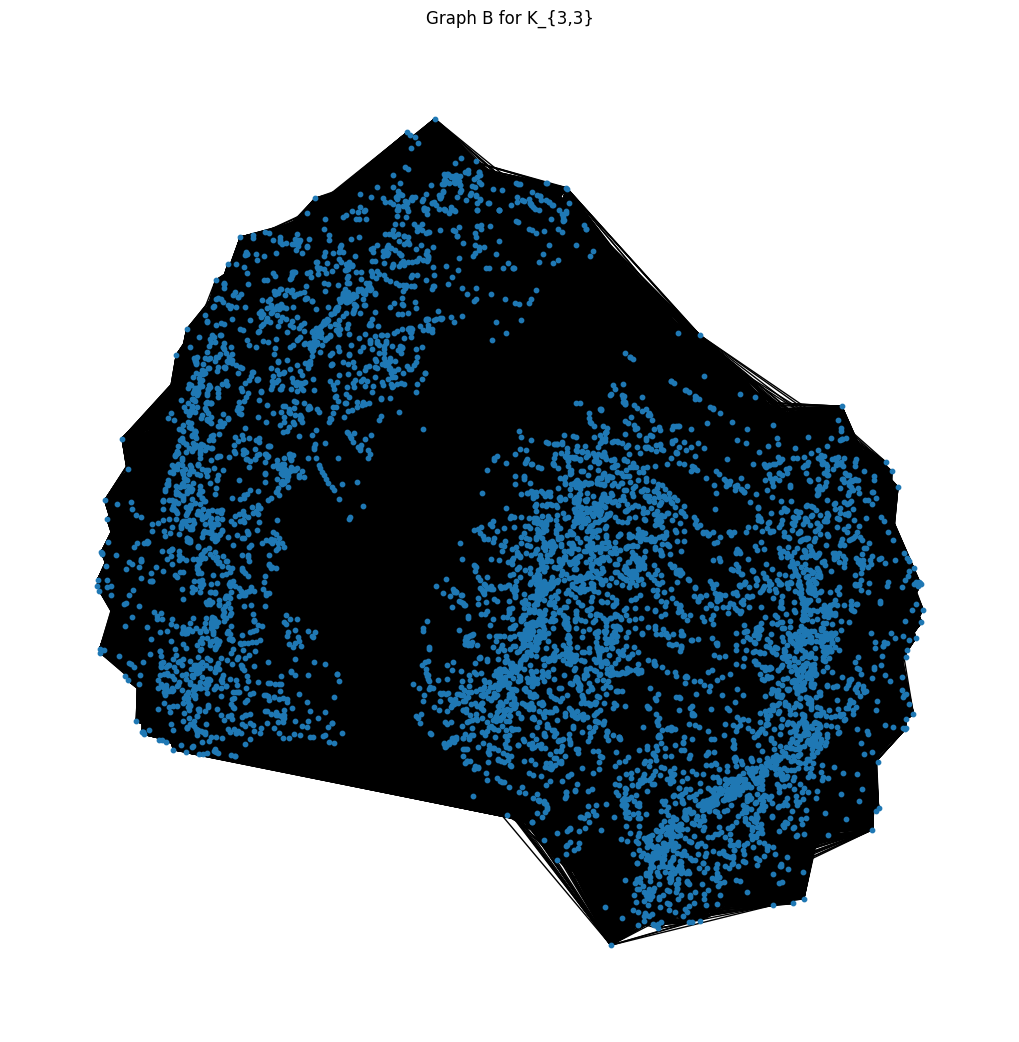

In [ ]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt

# Generate all possible paths of length 5 in K_{3,3}
nodes_1 = range(3)  # nodes of first partition
nodes_2 = range(3, 6)  # nodes of second partition
all_paths = list(itertools.product(nodes_1, nodes_2, repeat=4))

# Filter paths of length 5
all_paths = [(path[0],) + path[1:] for path in all_paths]

# Create the graph B for K_{3,3}
B = nx.Graph()

# Add nodes to B
for path in all_paths:
    B.add_node(path)

# Add edges based on the conditions
for path1 in B.nodes():
    for path2 in B.nodes():
        if (path1[0] == path2[4] and
            path1[1] != path2[0] and path1[1] != path2[1] and path1[1] != path2[2] and path1[1] != path2[3] and
            path1[2] != path2[1] and path1[2] != path2[2] and path1[2] != path2[3] and
            path1[3] != path2[2] and path1[3] != path2[3] and
            path1[4] != path2[3]):
            B.add_edge(path1, path2)

# Draw and display the graph B
pos = nx.spring_layout(B)  # Positions for all nodes

plt.figure(figsize=(10, 10))
nx.draw(B, pos, with_labels=False, node_size=10)
plt.title('Graph B for K_{3,3}')
plt.show()

# Print number of nodes and edges in B
print("Number of nodes:", B.number_of_nodes())
print("Number of edges:", B.number_of_edges())


In [ ]:
# Print number of nodes and edges in B
print("Number of nodes:", B.number_of_nodes())
print("Number of edges:", B.number_of_edges())
print(2480058 / 6561)

Number of nodes: 6561
Number of edges: 2480058
378.0


(0, 5, 2, 4, 1)
(1, 3, 2, 4, 0)
(2, 3, 0, 5, 1)
(1, 5, 2, 3, 0)
(0, 5, 1, 3, 2)
(0, 3, 1, 4, 2)
(0, 4, 1, 3, 2)
(1, 3, 0, 4, 2)
(1, 5, 0, 3, 2)
(0, 5, 1, 4, 2)
(0, 3, 2, 5, 1)
(2, 5, 1, 4, 0)
(1, 4, 2, 3, 0)
(1, 4, 2, 5, 0)
(2, 3, 1, 4, 0)
(2, 5, 0, 3, 1)
(1, 3, 2, 5, 0)
(2, 4, 0, 3, 1)
(0, 4, 2, 5, 1)
(1, 4, 0, 3, 2)
(2, 3, 1, 5, 0)
(1, 4, 0, 5, 2)
(2, 4, 1, 3, 0)
(0, 5, 2, 3, 1)
(2, 4, 1, 5, 0)
(0, 3, 2, 4, 1)
(2, 3, 0, 4, 1)
(1, 5, 2, 4, 0)
(0, 4, 2, 3, 1)
(0, 3, 1, 5, 2)
(2, 4, 0, 5, 1)
(2, 5, 0, 4, 1)
(1, 5, 0, 4, 2)
(1, 3, 0, 5, 2)
(2, 5, 1, 3, 0)
(0, 4, 1, 5, 2)


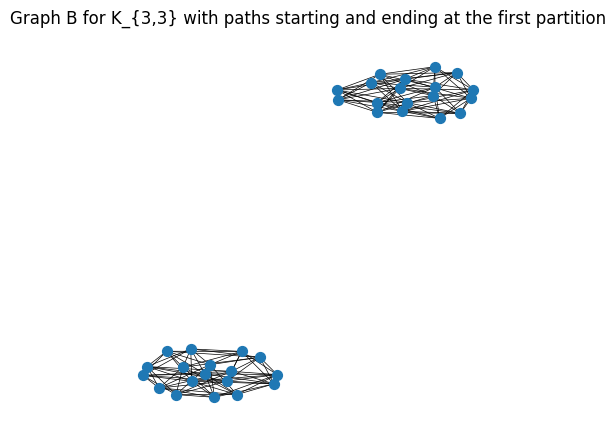

Number of nodes: 36
Number of edges: 144


In [ ]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt

# Generate all possible paths of length 5 in K_{3,3} where the first vertex is from the first partition
nodes_1 = range(3)  # nodes of first partition
nodes_2 = range(3, 6)  # nodes of second partition
fake_paths = list(itertools.product(nodes_1, nodes_2, repeat=3))

all_paths = []

for path in fake_paths:
  all_paths.append((path[0], path[1], path[2], path[3], path[4]))

all_paths = list(set(all_paths))

# Create the graph B for K_{3,3}
B = nx.Graph()

# Add nodes to B
for path in all_paths:
    if path[0] in nodes_1 and path[-1] in nodes_1 and len(set(path)) == len(path):  # Ensure the first and last vertices are from the first partition and no repeated vertices
        B.add_node(path)
        print(path)

# Add edges based on the conditions
for path1 in B.nodes():
    for path2 in B.nodes():
        if (path1[0] == path2[4] and
            path1[1] != path2[0] and path1[1] != path2[1] and path1[1] != path2[2] and
            path1[2] != path2[1] and path1[2] != path2[2] and
            path1[3] != path2[2] and
            path1[4] != path2[3]):
            B.add_edge(path1, path2)

plt.figure(figsize=(4, 4))
pos = nx.spring_layout(B)  # Spring layout for nodes
nx.draw(B, pos, with_labels=False, node_size=50, width=0.5)  # Thin edges and larger node size
plt.title('Graph B for K_{3,3} with paths starting and ending at the first partition')
plt.show()

print("Number of nodes:", B.number_of_nodes())
print("Number of edges:", B.number_of_edges())


In [ ]:
is_regular = nx.is_regular(B)
print("Is the graph regular?", is_regular)

girth = nx.cycle_basis(B)

# If the graph is acyclic, the girth is infinity
if not girth:
    print("The graph is acyclic, girth is infinity")
else:
    shortest_cycle_length = min(len(cycle) for cycle in girth)
    print("The girth of the graph is:", shortest_cycle_length)

chromatic_number = nx.greedy_color(B)

print("Chromatic number of the graph:", max(chromatic_number.values()) + 1)

Is the graph regular? True
The girth of the graph is: 4
Chromatic number of the graph: 6


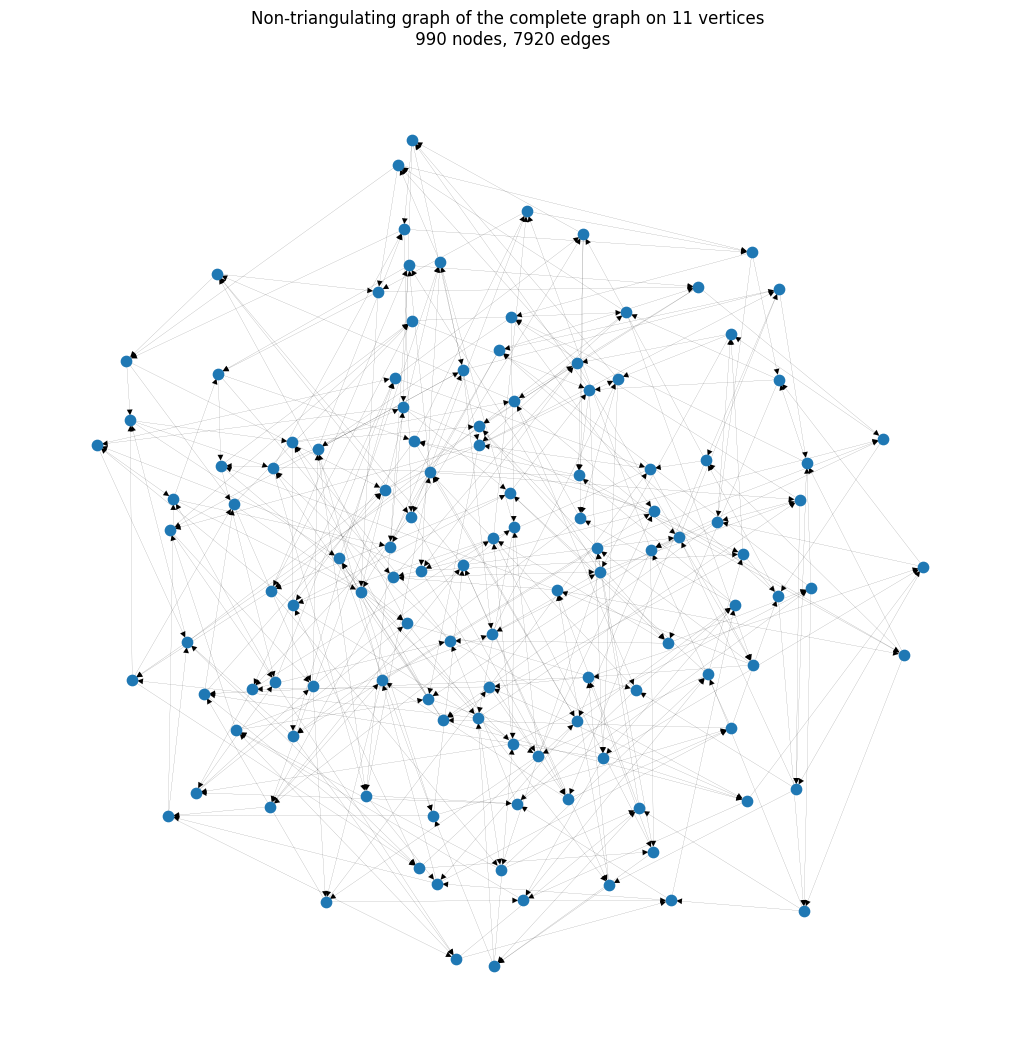

Number of nodes: 120
Number of edges: 360


In [ ]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt

# # Define the adjacency matrix of K_11
# adjacency_matrix = adjacency_matrix = [
#     [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
#     [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
#     [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
#     [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
#     [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
#     [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
#     [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
#     [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
#     [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
#     [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
#     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
# ]

# Generate all possible paths of length 6 in K_7
nodes = range(6) # number of nodes in G
all_paths = list(itertools.permutations(nodes, 3))

# Create the graph B
B = nx.DiGraph()

# Add nodes to B
for path in all_paths:
    B.add_node(path)

# Add edges based on the conditions
for path1 in B.nodes():
    for path2 in B.nodes():
        if (path1[1] == path2[0] and
            path1[2] == path2[1] and
            path1[0] != path2[2]):
            B.add_edge(path1, path2)

#Draw and display the graph B
pos = nx.spring_layout(B)  # Positions for all nodes

plt.figure(figsize=(10, 10))
nx.draw(B, pos, with_labels=False, node_size=55, width=0.07)
plt.title('Non-triangulating graph of the complete graph on 11 vertices \n 990 nodes, 7920 edges')
plt.show()

# Print number of nodes and edges in B
print("Number of nodes:", B.number_of_nodes())
print("Number of edges:", B.number_of_edges())

In [ ]:
import numpy as np

is_connected = nx.is_connected(B)
print("Is the graph connected", is_connected)

print(np.around(np.real(nx.adjacency_spectrum(B)), 1))

powered = np.around(np.power(nx.adjacency_spectrum(B), 7), 1)

print(sum(powered))


Is the graph connected True
[ 16.    9.  -11.6  -9.    9.6   9.6 -11.6  -7.   -9.    7.5   7.5   9.
   9.    9.6 -11.6  -7.   -9.   -2.   -2.    7.5   7.5 -11.6  -9.   -7.
  -7.   -2.   -2.   -0.5  -2.   -0.5  -0.5   1.    1.    1.    1.    1.
   1.   -0.5  -0.5  -0.5   1.    1.    1.    1.    0.    0.    0.   -0.
  -0.   -0.   -0.   -0.   -0.   -0.    0.    0.   -0.    0.    0.    0.
  -0.   -0.    0.    0.    0.    0.    0.   -0.   -0.   -0.   -0.   -0.
  -0.   -0.    0.   -0.   -0.    0.    0.   -0.   -0.   -0.   -0.   -0.
  -0.   -0.   -0.   -0.    9.6   9.    9.6   7.5  -9.  -11.6 -11.6  -7.
   9.    9.6  -9.    7.5   9.  -11.6  -7.    9.    7.5   9.6  -2.   -2.
  -7.   -2.   -0.5  -0.5   1.    1.    1.    1.    1.   -0.5   1.    1.
  -0.5   1.    1.   -9.  -11.6  -9.    9.    7.5   9.6 -11.6  -7.   -9.
 -11.6  -7.    7.5   9.6   9.   -9.    9.6   9.   -7.    7.5   9.   -2.
  -2.   -2.   -9.   -7.    7.5   1.    9.    7.5  -9.   -9.   -7.   -7.
   7.5  -9.    9.    9.   -7.   -9. 

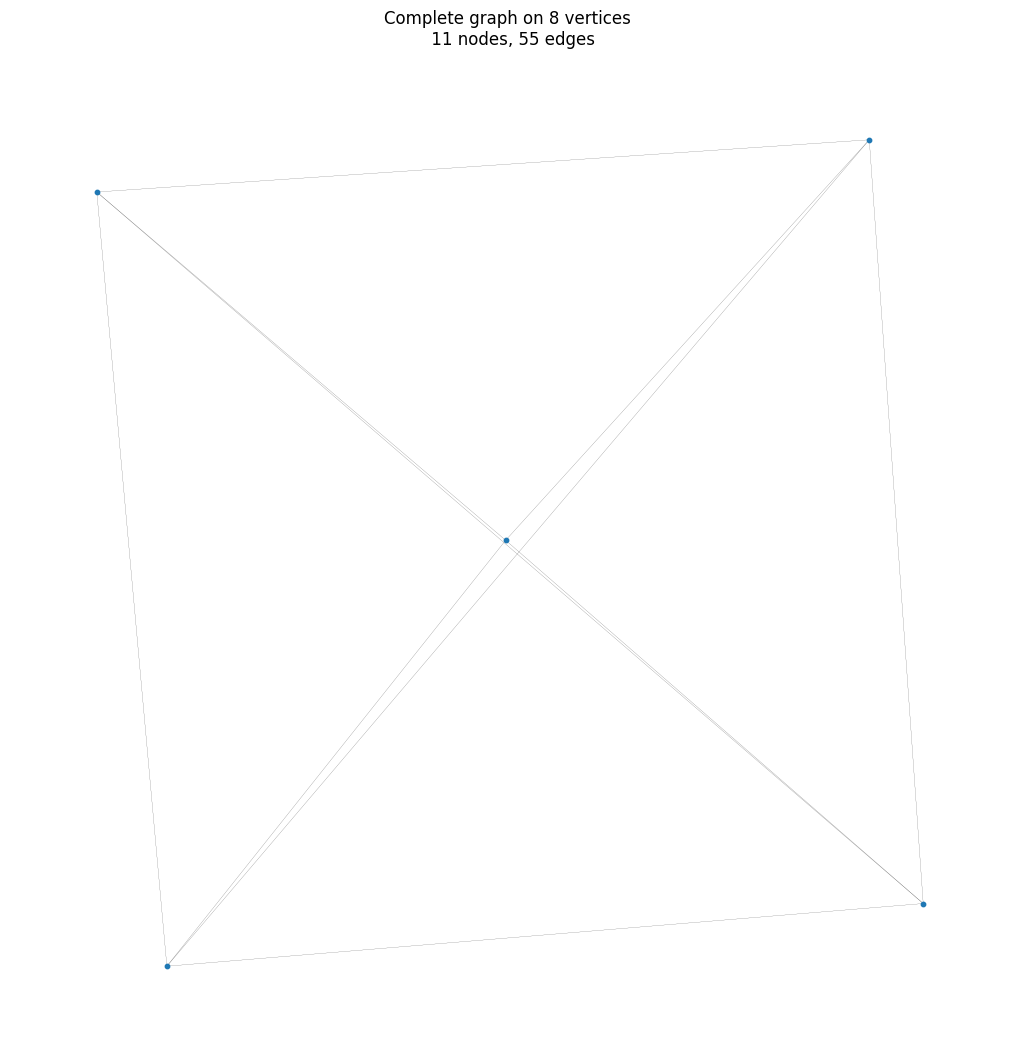

In [ ]:
G = nx.complete_graph(8)

pos = nx.spring_layout(G)
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=False, node_size=10, width=0.1)
plt.title('Complete graph on 8 vertices \n 11 nodes, 55 edges')
plt.show()


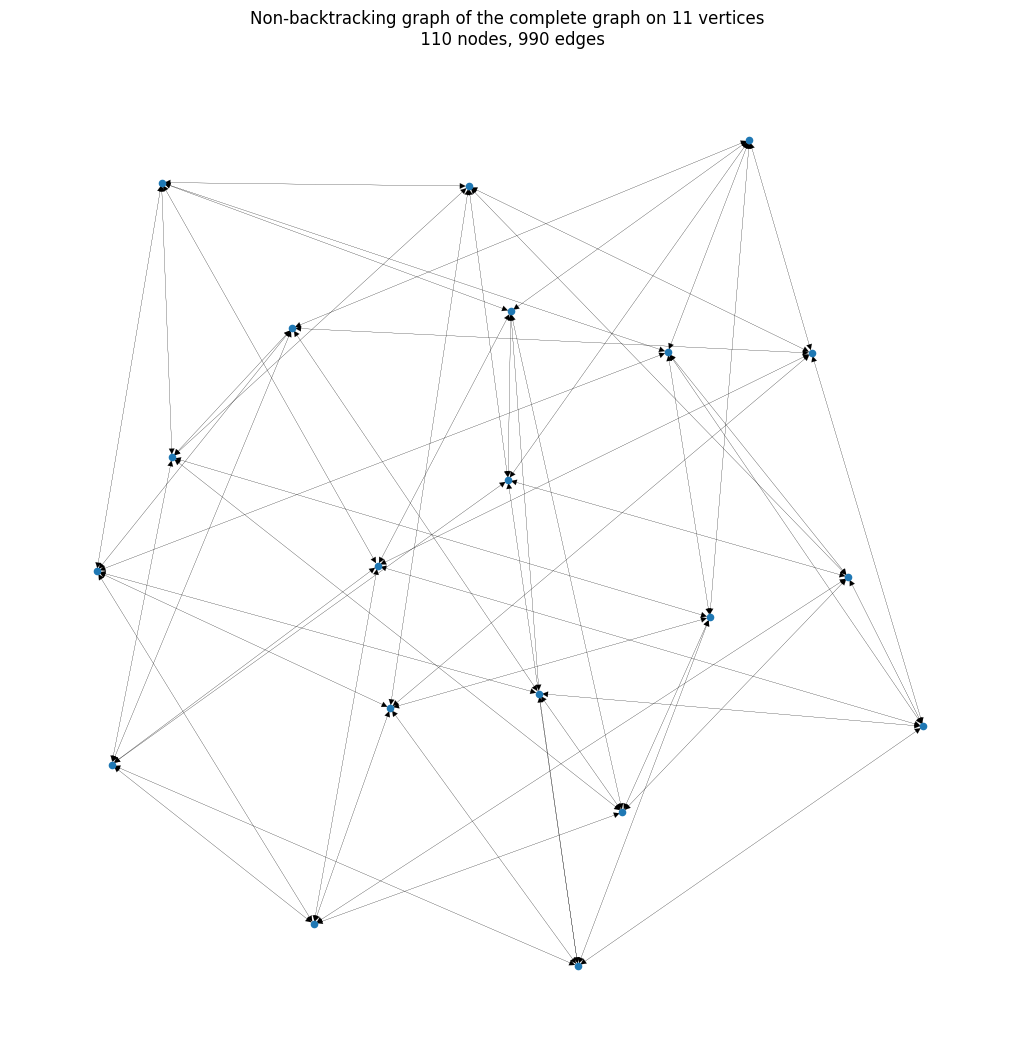

Number of nodes: 20
Number of edges: 120


In [ ]:
nodes = range(8)
all_paths = list(itertools.permutations(nodes, 2))

# Create the graph B
B = nx.Graph()

# Add nodes to B
for path in all_paths:
    B.add_node(path)

# Add edges based on the conditions
for path1 in B.nodes():
    for path2 in B.nodes():
        if (path1[1] == path2[0] and
            path1[0] != path2[1]):
            B.add_edge(path1, path2)

#Draw and display the graph B
pos = nx.spring_layout(B)  # Positions for all nodes

plt.figure(figsize=(10, 10))
nx.draw(B, pos, with_labels=False, node_size=20, width=0.1)
plt.title('Non-backtracking graph of the complete graph on 11 vertices \n 110 nodes, 990 edges')
plt.show()

print("Number of nodes:", B.number_of_nodes())
print("Number of edges:", B.number_of_edges())

The following calculates the power graph $G^H$ when given two graphs $H,G$.

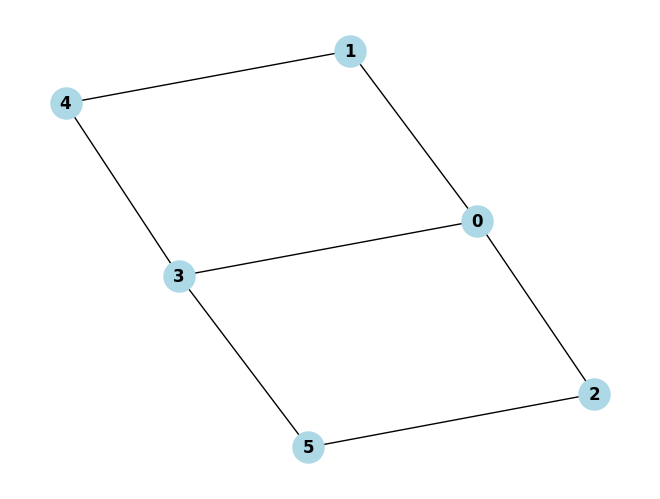

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def power_graph_adjacency_matrix(G_adj, H_adj):
    """
    Returns the adjacency matrix of the power graph G^H, where:
    - G_adj: adjacency matrix of graph G
    - H_adj: adjacency matrix of graph H
    """
    n_H = H_adj.shape[0]  # Number of vertices in H
    n_G = G_adj.shape[0]  # Number of vertices in G

    # Initialize the adjacency matrix for the power graph G^H
    power_graph_adj = np.zeros((n_H * n_G, n_H * n_G))

    # Fill the adjacency matrix
    for i in range(n_H):
        for j in range(n_H):
            if H_adj[i, j] == 1:  # There is an edge between i and j in H
                # Connect all nodes between the ith copy of G and jth copy of G
                for u in range(n_G):
                    for v in range(n_G):
                        if u == v:
                            power_graph_adj[i * n_G + u, j * n_G + v] = 1  # Copy of G vertices are connected
                        elif G_adj[u, v] == 1:
                            # Connect according to G's adjacency
                            power_graph_adj[i * n_G + u, i * n_G + v] = 1  # Within the same copy of G

    return power_graph_adj

def visualize_power_graph(adj_matrix):
    """
    Visualizes a graph given its adjacency matrix.
    - adj_matrix: adjacency matrix of the graph to visualize
    """
    G = nx.from_numpy_array(adj_matrix)

    # Plot the graph
    pos = nx.spring_layout(G)  # Position the nodes using a force-directed layout
    nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=500)
    plt.show()

# Example Usage:
G_adj = np.array([
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 0]
])  # Adjacency matrix of G (Example: a small triangle graph)

H_adj = np.array([
    [0, 1],
    [1, 0]
])  # Adjacency matrix of H (Example: a simple two-node graph)

# Compute the adjacency matrix of the power graph G^H
power_graph_adj = power_graph_adjacency_matrix(G_adj, H_adj)

# Visualize the power graph
visualize_power_graph(power_graph_adj)


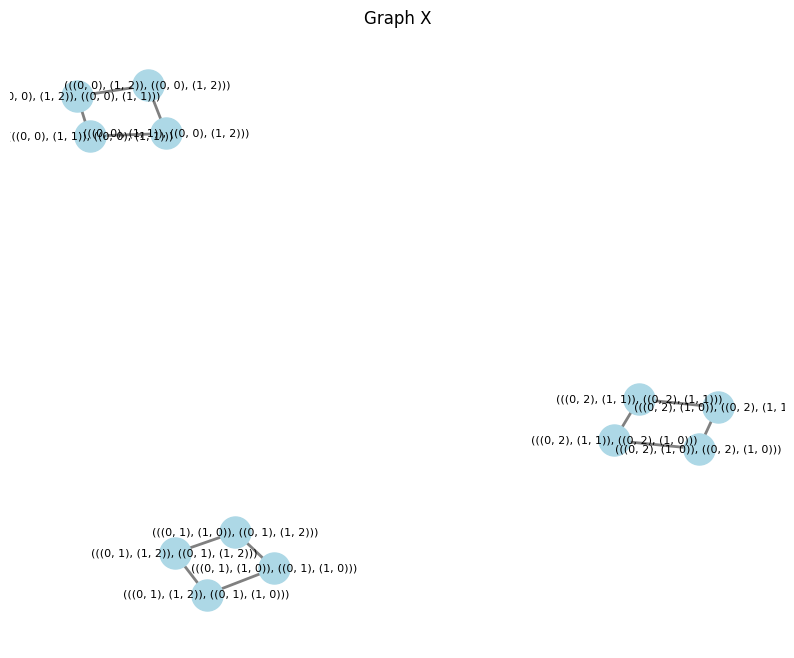

In [ ]:
import numpy as np
import itertools
import networkx as nx
import matplotlib.pyplot as plt

def adjacency_to_graph(adj_matrix):
    """Converts an adjacency matrix to a NetworkX graph."""
    G = nx.Graph()
    num_nodes = adj_matrix.shape[0]

    for i in range(num_nodes):
        for j in range(i+1, num_nodes):
            if adj_matrix[i, j] == 1:
                G.add_edge(i, j)

    return G

def homomorphisms_from_matrix(F_adj, G_adj):
    """Returns all homomorphisms from graph F (adjacency matrix) to graph G (adjacency matrix)."""
    F_nodes = list(range(F_adj.shape[0]))
    G_nodes = list(range(G_adj.shape[0]))
    mappings = []

    # Generate all mappings from F's nodes to G's nodes
    for mapping in itertools.product(G_nodes, repeat=len(F_nodes)):
        # Check if the mapping preserves edges
        is_homomorphism = True
        for u in range(len(F_nodes)):
            for v in range(u+1, len(F_nodes)):
                if F_adj[u, v] == 1 and G_adj[mapping[u], mapping[v]] != 1:
                    is_homomorphism = False
                    break
            if not is_homomorphism:
                break

        if is_homomorphism:
            mapping_dict = {F_nodes[i]: mapping[i] for i in range(len(F_nodes))}
            mappings.append(mapping_dict)

    return mappings

def construct_S(F_adj, v, H_adj, w, G_adj):
    """Constructs the subset S of Hom(F, G) x Hom(H, G) such that f(v) = g(w)."""
    hom_F_G = homomorphisms_from_matrix(F_adj, G_adj)
    hom_H_G = homomorphisms_from_matrix(H_adj, G_adj)

    S = []

    # Iterate over all pairs of homomorphisms
    for f in hom_F_G:
        for g in hom_H_G:
            # Check if f(v) = g(w)
            if f[v] == g[w]:
                S.append((f, g))

    return S

def dict_to_tuple(d):
    """Converts a dictionary to a tuple of sorted key-value pairs."""
    return tuple(sorted(d.items()))

def build_X(S, F_adj, H_adj):
    """Builds the graph X from the set S, with the correct edge condition on (x, y) pairs."""
    X = nx.Graph()

    # Convert (f, g) into a hashable form and add all elements of S as nodes in X
    S_hashed = [(dict_to_tuple(f), dict_to_tuple(g)) for f, g in S]
    X.add_nodes_from(S_hashed)

    # Iterate over all pairs of homomorphisms in S to add edges
    for (f, g) in S:
        for (a, b) in S:
            if (f, g) != (a, b):
                f_equal_a = (f == a)
                g_equal_b = (g == b)

                # Case 1: f and a differ by one vertex, but g = b
                if not f_equal_a and g_equal_b:
                    differences = 0
                    for x in range(F_adj.shape[0]):
                        if f[x] != a[x]:
                            differences += 1
                        if differences > 1:
                            break

                    if differences == 1:
                        X.add_edge((dict_to_tuple(f), dict_to_tuple(g)), (dict_to_tuple(a), dict_to_tuple(b)))

                # Case 2: g and b differ by one vertex, but f = a
                elif f_equal_a and not g_equal_b:
                    differences = 0
                    for y in range(H_adj.shape[0]):
                        if g[y] != b[y]:
                            differences += 1
                        if differences > 1:
                            break

                    if differences == 1:
                        X.add_edge((dict_to_tuple(f), dict_to_tuple(g)), (dict_to_tuple(a), dict_to_tuple(b)))

    return X

def draw_graph(X):
    """Draws the graph X using matplotlib and networkx."""
    pos = nx.spring_layout(X)  # Positions for all nodes

    plt.figure(figsize=(10, 8))

    # Draw the nodes and edges
    nx.draw_networkx_nodes(X, pos, node_size=500, node_color='lightblue')
    nx.draw_networkx_edges(X, pos, edgelist=X.edges(), width=2, edge_color='gray')

    # Draw the labels (representing the homomorphisms as tuples)
    labels = {node: f"{node}" for node in X.nodes()}
    nx.draw_networkx_labels(X, pos, labels, font_size=8, font_color='black')

    plt.title("Graph X")
    plt.axis('off')  # Turn off the axis
    plt.show()

# Example usage with adjacency matrices:

# Define adjacency matrices for F, H, and G
F_adj = np.array([[0, 1],[1,0]])
H_adj = np.array([[0, 1], [1, 0]])
G_adj = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]])

# Define the vertices v in F and w in H
v = 0  # Vertex 1 in F
w = 0  # Vertex 4 in H

# Construct S from adjacency matrices
S = construct_S(F_adj, v, H_adj, w, G_adj)

# Build the graph X from S
X = build_X(S, F_adj, H_adj)

# Draw the graph X
draw_graph(X)


Edges of graph X:


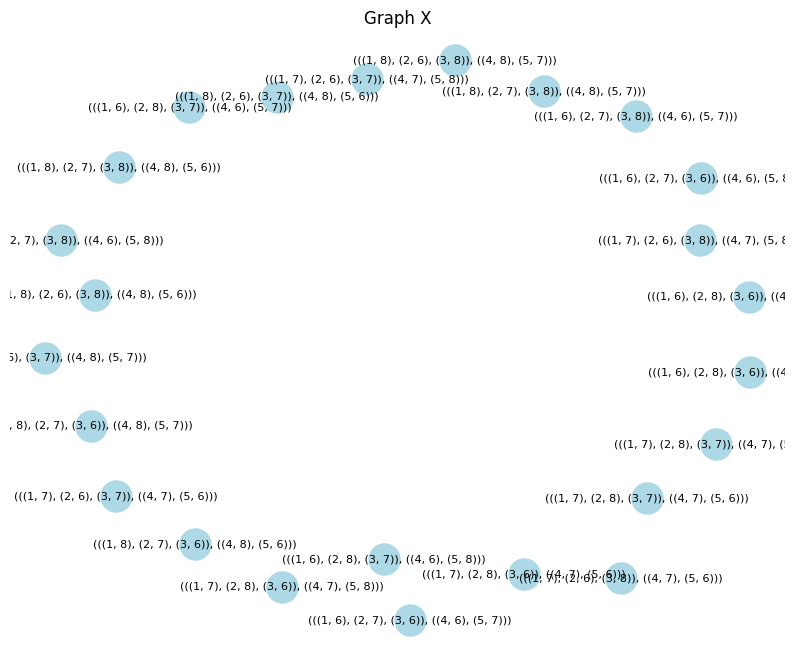

The following deals with valid rainbow paths.

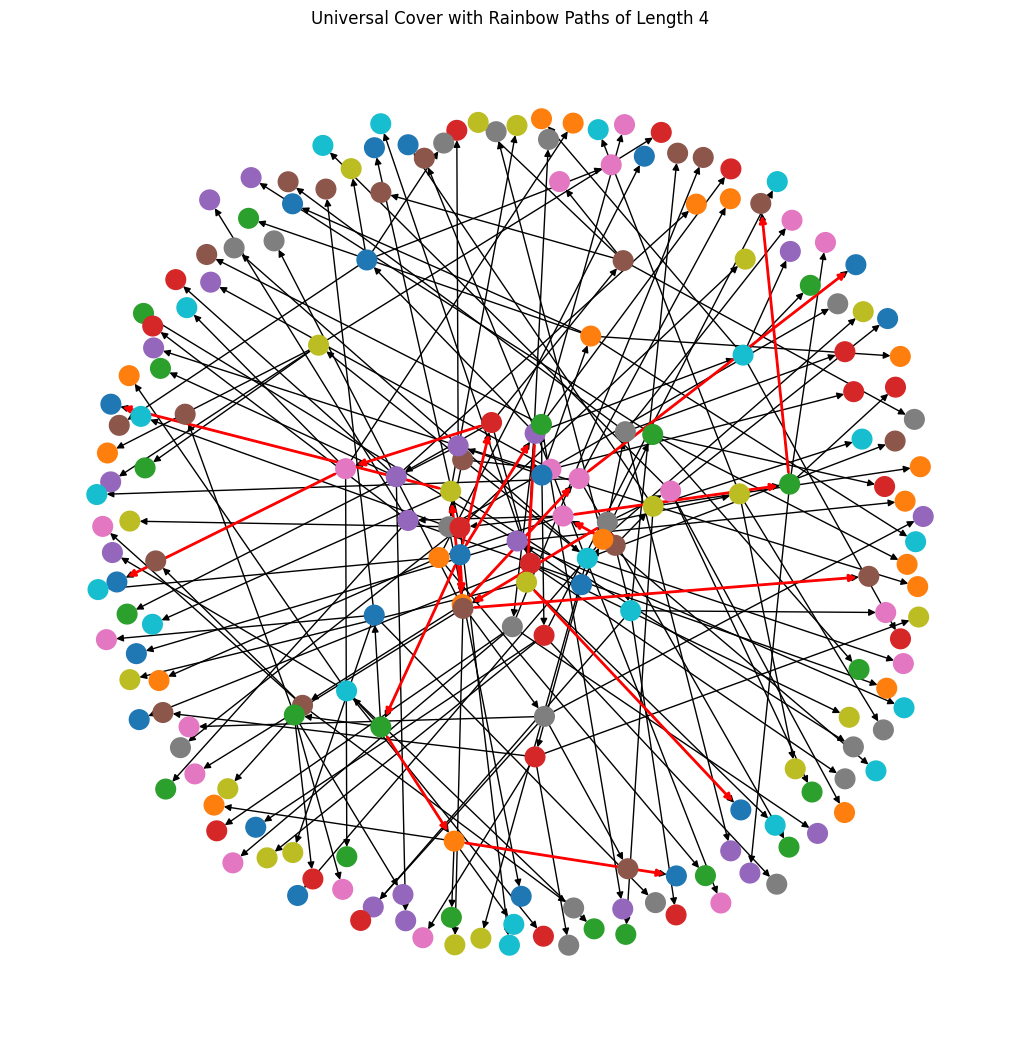

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

def universal_cover_graph(adj_matrix, max_nodes):
    """Generate a truncated universal cover with a maximum number of nodes."""
    # Create a directed graph for the universal cover
    G = nx.DiGraph()

    # Track unique paths and nodes using BFS, stopping when max_nodes is reached
    queue = deque([(start_node,) for start_node in range(len(adj_matrix))])
    while queue and len(G) < max_nodes:
        path = queue.popleft()
        last_node = path[-1]

        # Explore neighbors
        for neighbor in range(len(adj_matrix)):
            if adj_matrix[last_node][neighbor] == 1:  # there's an edge
                new_path = path + (neighbor,)

                # Add new path if it hasn't been added to the graph yet
                if new_path not in G:
                    G.add_edge(path, new_path)
                    queue.append(new_path)

                    # Stop if we've added enough nodes
                    if len(G) >= max_nodes:
                        break

    return G

def find_k_length_paths(G, start_node, k):
    """Find all simple paths of length k+1 starting from start_node."""
    paths = []
    queue = deque([(start_node, [start_node])])

    while queue:
        current_node, path = queue.popleft()
        if len(path) == k + 1:
            paths.append(path)
            continue
        for neighbor in G.neighbors(current_node):
            if neighbor not in path:  # ensure no cycles
                queue.append((neighbor, path + [neighbor]))

    return paths

def highlight_rainbow_paths(G, k):
    """Highlight all rainbow paths of length k+1 in the universal cover graph."""
    # Assign a unique color to each node based on its path
    path_colors = {node: i % 10 for i, node in enumerate(G.nodes)}  # color cycle for 10 colors

    # Define node colors for visualization
    node_colors = [path_colors[node] for node in G.nodes]

    # Find all paths of length k+1 and check for rainbow path property
    rainbow_paths = []
    for node in G.nodes:
        paths = find_k_length_paths(G, node, k)
        for path in paths:
            # Check for the rainbow path condition: unique colors except for endpoints
            path_colors_used = [path_colors[n] for n in path]
            if len(set(path_colors_used[1:-1])) == len(path_colors_used[1:-1]) and (path_colors_used[0] == path_colors_used[-1]):
                rainbow_paths.append(path)

    # Plot the graph
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, node_color=node_colors, with_labels=False, node_size=200, cmap=plt.cm.tab10)

    # Highlight rainbow paths with bold edges
    for path in rainbow_paths:
        edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='r', width=2)

    plt.title(f"Universal Cover with Rainbow Paths of Length {k+1}")
    plt.show()

# Example usage
adj_matrix = np.array([
    [0, 1, 1, 1, 1],
    [1, 0, 1, 1, 1],
    [1, 1, 0, 1, 1],
    [1, 1, 1, 0, 1],
    [1, 1, 1, 1, 0]
])

max_nodes = 200  # Limit on the number of nodes in the universal cover
k = 3  # Length for rainbow path (k+1 for path length)

G = universal_cover_graph(adj_matrix, max_nodes)
highlight_rainbow_paths(G, k)


In [ ]:
pip install ipysigma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.4 MB/s eta 0:00:00


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
import networkx as nx
from ipysigma import Sigma

Sigma(G)

TypeError: ipysigma only supports node keys that have one of the following types: int, str, float, numpy.integer, numpy.floating (found a tuple key)

In [ ]:
import numpy as np
import networkx as nx
from collections import deque
import ipysigma as sigma

def universal_cover_graph(adj_matrix, max_nodes):
    """Generate a truncated universal cover with a maximum number of nodes."""
    G = nx.DiGraph()

    queue = deque([(start_node,) for start_node in range(len(adj_matrix))])
    while queue and len(G) < max_nodes:
        path = queue.popleft()
        last_node = path[-1]

        for neighbor in range(len(adj_matrix)):
            if adj_matrix[last_node][neighbor] == 1:  # there's an edge
                new_path = path + (neighbor,)

                if new_path not in G:
                    G.add_edge(path, new_path)
                    queue.append(new_path)

                    if len(G) >= max_nodes:
                        break

    return G

def find_k_length_paths(G, start_node, k):
    """Find all simple paths of length k+1 starting from start_node."""
    paths = []
    queue = deque([(start_node, [start_node])])

    while queue:
        current_node, path = queue.popleft()
        if len(path) == k + 1:
            paths.append(path)
            continue
        for neighbor in G.neighbors(current_node):
            if neighbor not in path:  # ensure no cycles
                queue.append((neighbor, path + [neighbor]))

    return paths

def highlight_rainbow_paths_ipysigma(G, k):
    """Create an ipysigma interactive visualization highlighting rainbow paths of length k+1."""
    path_colors = {node: i % 10 for i, node in enumerate(G.nodes)}

    rainbow_paths = []
    for node in G.nodes:
        paths = find_k_length_paths(G, node, k)
        for path in paths:
            path_colors_used = [path_colors[n] for n in path]
            if len(set(path_colors_used[1:-1])) == len(path_colors_used[1:-1]) and (path_colors_used[0] == path_colors_used[-1]):
                rainbow_paths.append(path)

    # Add styling to nodes
    for node in G.nodes:
        color = f"tab{path_colors[node]}"
        G.nodes[node]['label'] = str(node)
        G.nodes[node]['color'] = color

    # Add styling to edges and highlight rainbow paths
    for edge in G.edges:
        G.edges[edge]['color'] = "grey"

    for path in rainbow_paths:
        edges = list(zip(path, path[1:]))
        for u, v in edges:
            G.edges[(u, v)]['color'] = "red"
            G.edges[(u, v)]['size'] = 2

    # Display the graph using ipysigma
    sigma_graph = sigma.Sigma(G)
    sigma_graph.display(width=800, height=600)

# Example usage
adj_matrix = np.array([
    [0, 1, 1, 1, 1],
    [1, 0, 1, 1, 1],
    [1, 1, 0, 1, 1],
    [1, 1, 1, 0, 1],
    [1, 1, 1, 1, 0]
])

max_nodes = 100
k = 3

G = universal_cover_graph(adj_matrix, max_nodes)
highlight_rainbow_paths_ipysigma(G, k)


TypeError: ipysigma only supports node keys that have one of the following types: int, str, float, numpy.integer, numpy.floating (found a tuple key)

Computing eigenvalue powers of non-triangulating matrices

In [ ]:
import numpy as np

def op(lam, c, d, k):

    if lam <= 0:
      return 0
    # Calculate the terms once to avoid repetition
    inner_term = lam**2 - (c - 1) - (d - 1)
    sqrt_term = np.sqrt(inner_term**2 - 4 * (c - 1) * (d - 1) + 0j)

    # Calculate the four possible values
    pp = np.sqrt((d - 1) * (inner_term + sqrt_term) / (2 * (c - 1)) + 0j)
    pn = np.sqrt((d - 1) * (inner_term - sqrt_term) / (2 * (c - 1)) + 0j)
    np = -pp
    nn = -pn

    # Return the sixth powers of each value
    return pp**(2*k) +  pn**(2*k) + np**(2*k) + nn**(2*k)


Spectral Optimization in Python attempt...

In [ ]:
import numpy as np
import math
from scipy.optimize import minimize

# Parameters
k = 7

# Range of d and n values, filtering for cases where n > d
d_values = range(9, 18, 2)  # Test for d = 9, 11, 13, 15, 17
n_values = range(10, 51, 10)  # Test for n = 10, 20, 30, 40, 50

# Binomial coefficients for k = 7
binom_coeffs = [math.comb(k, 2 * i) for i in range(1, k // 2 + 1)]

# Objective function
def objective(lambdas, d):
    total_sum = 0
    for lambda_j in lambdas:
        inner_sum = 0
        for i in range(1, k // 2 + 1):
            term = binom_coeffs[i - 1] * 4 * (lambda_j / 2)**(k - 2 * i) * ((lambda_j**2 - 4 * (d - 1)) / 2)**i
            inner_sum += term
        total_sum += inner_sum

    # Stronger penalty to encourage the largest positive eigenvalue to be 7
    max_positive_eigenvalue = np.max(lambdas)
    penalty = 1e12 * (max_positive_eigenvalue - 7)**2  # Increased penalty factor

    return -total_sum + penalty  # Maximize by minimizing the negative

# Constraints
def constraint_sum_zero(lambdas):
    return np.sum(lambdas)

def constraint_sum_squares(lambdas, n, d):
    return np.sum(lambdas**2) - n * d

def constraint_max_eigenvalue(lambdas):
    # Constrain the largest positive eigenvalue to not exceed 7
    return 7 - np.max(lambdas)

# Run optimization for each combination of d and n where n > d
for d in d_values:
    for n in n_values:
        if n > d:  # Only include cases where n > d
            # Initial guess
            initial_guess = np.concatenate([np.full(n // 2, d * 0.9), np.full(n // 2, -d * 0.9)])

            # Constraints for optimization
            constraints = [
                {"type": "eq", "fun": constraint_sum_zero},
                {"type": "eq", "fun": lambda lambdas: constraint_sum_squares(lambdas, n, d)},
                {"type": "ineq", "fun": constraint_max_eigenvalue}  # New constraint to limit max eigenvalue to 7
            ]

            # Bounds
            bounds = [(-d, d) for _ in range(n)]

            # Run optimization
            result = minimize(objective, initial_guess, args=(d,), method="trust-constr", constraints=constraints, bounds=bounds, options={'maxiter': 10000})

            # Display results for successful optimizations
            if result.success:
                print(f"\nOptimization successful for d={d}, n={n}")
                print("Maximized Objective Value:", -result.fun)  # Revert sign to get the maximized value
                print("Predicted Bound: ", n*d*(d-1)*(d-2)*(d-3)*(d-4)*(d-5))
                print(-result.fun < n*d*(d-1)*(d-2)*(d-3)*(d-4)*(d-5))
                print("Eigenvalues λ_i:", result.x)
                print("Maximum Eigenvalue:", np.max(result.x))

                # Calculate and print the sum of the k-th powers of the eigenvalues
                sum_kth_powers = np.sum(result.x**k)
                print(f"Sum of the {k}-th powers of the eigenvalues:", sum_kth_powers)
            else:
                print(f"\nOptimization failed for d={d}, n={n}: {result.message}")
He

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_differentiable_functions.py:231: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)



Optimization successful for d=9, n=10
Maximized Objective Value: 1223068.8839883495
Predicted Bound:  604800
False
Eigenvalues λ_i: [ 2.94071111  2.94071136  7.         -1.84020322 -1.84020319 -1.84020323
 -1.84020319 -1.84020323 -1.84020325 -1.84020316]
Maximum Eigenvalue: 6.999999997315383
Sum of the 7-th powers of the eigenvalues: 826846.3966284726

Optimization successful for d=9, n=20
Maximized Objective Value: 2628785.528571034
Predicted Bound:  1209600
False
Eigenvalues λ_i: [ 3.66667894  3.66664317 -1.66659    -1.66672043  6.99999769 -1.66664983
 -1.66663478 -1.66668436  3.66668544  6.99999766 -1.66671715 -1.66680384
 -1.66674854 -1.66644455 -1.66663754 -1.66660563 -1.66668907 -1.66672176
 -1.66663985 -1.66671559]
Maximum Eigenvalue: 6.999997685001737
Sum of the 7-th powers of the eigenvalues: 1673277.8295608663

Optimization successful for d=9, n=30
Maximized Objective Value: 1397477.4203641065
Predicted Bound:  1814400
True
Eigenvalues λ_i: [ 2.96031992  2.96031981  2.960319

NameError: name 'He' is not defined

In [ ]:
import numpy as np

# Define the adjacency matrix based on the provided values
adj_matrix = np.array([
    [0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0],
[1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0],
[1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,1],
[1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,1],
[1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1],
[1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1],
[1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1],
[1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1],
[1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1],
[1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
[0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1],
[0,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0],
[0,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0],
[0,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0],
[0,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0],
[0,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0],
[0,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0],
[0,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0],
[0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0],
[0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0]
])

# Calculate eigenvalues of the adjacency matrix
eigenvalues = np.linalg.eigvals(adj_matrix)

# Use only real parts of eigenvalues (in case of small imaginary precision errors)
eigenvalues = np.real(eigenvalues)

# Calculate the sum of the 7th powers of the eigenvalues
sum_seventh_powers = np.sum(eigenvalues**7)

# Display results
print("Eigenvalues:", eigenvalues)
print("Sum of the 7th powers of the eigenvalues:", sum_seventh_powers)


Eigenvalues: [-9.  9.  1.  1. -1. -1.  1.  1. -1.  1. -1. -1. -1.  1.  1.  1. -1. -1.
  1. -1.]
Sum of the 7th powers of the eigenvalues: 1.955777273465742e-08


In [ ]:
eigenvalues

array([-9.,  9.,  1.,  1., -1., -1.,  1.,  1., -1.,  1., -1., -1., -1.,
        1.,  1.,  1., -1., -1.,  1., -1.])

In [ ]:
adj_matrix - adj_matrix.T

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
import numpy as np

def blowup_adjacency_matrix(A, b):
    """
    Returns the blow-up of the adjacency matrix A of size b.
    Each vertex in the original graph is replaced by b vertices.
    """
    n = A.shape[0]  # number of vertices in the original graph
    # Create a new adjacency matrix for the blow-up graph of size (n * b) x (n * b)
    blowup_matrix = np.zeros((n * b, n * b), dtype=int)

    # Loop through each edge in the original graph
    for i in range(n):
        for j in range(n):
            if A[i, j] == 1:  # If there is an edge between vertex i and j in the original graph
                for k in range(b):
                    for l in range(b):
                        blowup_matrix[i * b + k, j * b + l] = 1  # Connect all vertices in the blow-up

    return blowup_matrix

# Example usage:
# Define the adjacency matrix of a 5-cycle
A = np.array([[0, 1, 0, 0, 1],
              [1, 0, 1, 0, 0],
              [0, 1, 0, 1, 0],
              [0, 0, 1, 0, 1],
              [1, 0, 0, 1, 0]])

# Set blow-up size b
b = 7

# Get the blow-up adjacency matrix
blowup_A = blowup_adjacency_matrix(A, b)

print(blowup_A)
eigenvalues = np.linalg.eigvals(blowup_A)
print(eigenvalues)
nob = objective(eigenvalues, 14)
sum_seventh_powers = np.sum(eigenvalues**7)
print(sum_seventh_powers)
print(nob)
print(35*14*13*12*11*10*9)
print(nob < 35*14*13*12*11*10*9)

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]
[-1.13262379e+01+0.00000000e+00j  1.40000000e+01+0.00000000e+00j
 -2.23633086e-15+0.00000000e+00j  4.32623792e+00+0.00000000e+00j
 -1.13262379e+01+0.00000000e+00j -5.50341023e-16+0.00000000e+00j
  4.32623792e+00+0.00000000e+00j  3.18905260e-16+0.00000000e+00j
 -2.38471837e-16+0.00000000e+00j -7.92564699e-17+0.00000000e+00j
  2.38826844e-16+0.00000000e+00j  1.40800738e-16+0.00000000e+00j
  6.46113976e-17+0.00000000e+00j  4.20732780e-28+0.00000000e+00j
 -4.20731561e-28+0.00000000e+00j  2.21288944e-32+2.31048409e-32j
  2.21288944e-32-2.31048409e-32j -3.18842586e-32+0.00000000e+00j
  1.90502494e-32+0.00000000e+00j -1.71604065e-32+0.00000000e+00j
  9.82543641e-33+0.00000000e+00j -6.84522488e-33+0.00000000e+00j
  7.51669498e-34+3.14737703e-33j  7.51669498e-34-3.14737703e-33j
  8.12407419e-34+0.00000000e+00j -3.76986923e-35+0.00000000e+00j
  2.13226362e-35+0.00000000e+00j -6

NameError: name 'objective' is not defined

In [ ]:
pip install ipysigma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.4 MB/s eta 0:00:00


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
import numpy as np
import networkx as nx
from scipy.linalg import eigh
from ipysigma import Sigma

# Given eigenvalues (example array based on the question)
eigenvalues = np.array([
    11, -6.94188, -6.94188, -6.94188, -6.94188,
    0.761942, 0.761942, 0.761942, 0.761942, 0.761942,
    0.761942, 0.761942, 0.761942, 0.761942, 0.761942,
    0.761942, 0.761942, 0.761942, 0.761942, 0.761942,
    -1.51908
])

# Construct a symmetric, loopless, binary matrix from the given eigenvalues
def construct_simple_graph_matrix(eigenvalues, threshold=0.5):
    n = len(eigenvalues)
    Q = np.random.rand(n, n)  # Random orthogonal matrix
    Q, _ = np.linalg.qr(Q)  # QR decomposition to ensure orthogonality
    A = Q @ np.diag(eigenvalues) @ Q.T  # Create symmetric matrix
    A = (A + A.T) / 2  # Ensure symmetry

    # Binarize matrix: edges if above threshold, no edge otherwise
    A = (np.abs(A) > threshold).astype(int)

    # Set the diagonal to zero to remove self-loops
    np.fill_diagonal(A, 0)

    return A

# Create the adjacency matrix
adj_matrix = construct_simple_graph_matrix(eigenvalues)

# Create the graph from the adjacency matrix
G = nx.from_numpy_array(adj_matrix)

# Use ipysigma for an interactive visualization
Sigma(G, default_edge_color="#888")


Sigma(nx.Graph with 21 nodes and 129 edges)

In [ ]:
A = np.array([[0, 1, 0, 0, 1],
              [1, 0, 1, 0, 0],
              [0, 1, 0, 1, 0],
              [0, 0, 1, 0, 1],
              [1, 0, 0, 1, 0]])

original = np.linalg.eigvals(A)
print(np.round(np.real(original),3)*5)

# Set blow-up size b
b = 5

# Get the blow-up adjacency matrix
blowup_A = blowup_adjacency_matrix(A, b)

eigs = np.linalg.eigvals(blowup_A)

cycles = np.sum(eigs ** 7)

print(cycles)
print(np.round(np.real(eigs),3))

[-8.09  3.09 10.   -8.09  3.09]
(5468750.000000019+0j)
[-8.09 10.   -0.    3.09 -8.09  0.    3.09 -0.    0.    0.   -0.   -0.
  0.    0.   -0.   -0.    0.    0.   -0.    0.   -0.   -0.    0.    0.
  0.  ]


In [ ]:
import numpy as np

# Vertices of the hexagon in the XY-plane
vertices = np.array([
    [4.10, 1.10],
    [3.00, -3.00],
    [1.10, 4.10],
    [-3.00, 3.00],
    [-1.10, -4.10],
    [-4.10, -1.10]
])

# Calculate the edge lengths
edge_lengths = []
for i in range(len(vertices)):
    # Compute the distance to the next vertex (circular, so we connect the last to the first)
    next_i = (i + 1) % len(vertices)
    distance = np.linalg.norm(vertices[next_i] - vertices[i])
    edge_lengths.append(distance)

# Convert edge_lengths to a set to check for distinct values
distinct_edge_lengths = set(edge_lengths)

# Display the edge lengths and the distinct ones
print("Edge lengths:", edge_lengths)
print("Distinct edge lengths:", distinct_edge_lengths)


Edge lengths: [4.244997055358225, 7.349829930005183, 4.244997055358225, 7.349829930005183, 4.242640687119285, 8.48999411071645]
Distinct edge lengths: {8.48999411071645, 4.244997055358225, 4.242640687119285, 7.349829930005183}


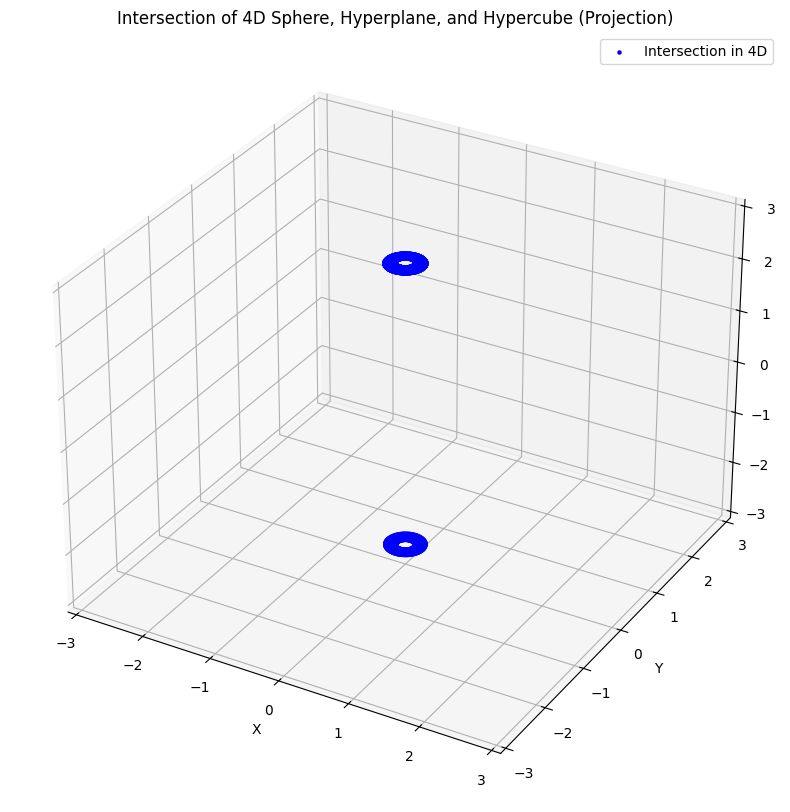

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Number of dimensions
n_dim = 4

# Parameters for the sphere
radius = np.sqrt(15 / 2)

# Parametric values for the sphere intersection (4D)
theta = np.linspace(0, 2 * np.pi, 500)
phi = np.linspace(0, np.pi, 500)
theta, phi = np.meshgrid(theta, phi)

# Parametric equations for the sphere in 4D
x = radius * np.sin(phi) * np.cos(theta)
y = radius * np.sin(phi) * np.sin(theta)
z = radius * np.cos(phi)
w = -x - y - z  # From the hyperplane equation x + y + z + w = 0

# Apply the hypercube constraint: max(|x|, |y|, |z|, |w|) = 3
valid_indices = []

for i in range(len(x)):
    if np.max(np.abs([x[i], y[i], z[i], w[i]])) >= 2.9 and np.max(np.abs([x[i], y[i], z[i], w[i]])) <= 3.1:
        valid_indices.append(i)

# Filter points that satisfy the cube constraint
x_valid = x[valid_indices]
y_valid = y[valid_indices]
z_valid = z[valid_indices]
w_valid = w[valid_indices]

# Plotting (project the 4D points onto 3D space)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D projection of the 4D points
ax.scatter(x_valid, y_valid, z_valid, c='blue', label='Intersection in 4D', s=5)

# Plot settings
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Intersection of 4D Sphere, Hyperplane, and Hypercube (Projection)')
ax.legend()

plt.show()


In [ ]:
import numpy as np
import networkx as nx
from scipy.interpolate import Rbf  # Radial basis function for smooth interpolation

# Step 1: Generate the eigenvalues of d-regular graphs on n vertices
def eigenvalues_d_regular_graph(d, n):
    """Generate the eigenvalues of a random d-regular graph with n vertices."""
    G = nx.random_regular_graph(d, n)
    A = nx.adjacency_matrix(G).todense()
    try:
        eigenvalues = np.linalg.eigvals(A)  # Compute eigenvalues
    except np.linalg.LinAlgError:
        print("Matrix is singular, applying perturbation.")
        epsilon = 1e-10
        A += epsilon * np.eye(A.shape[0])
        eigenvalues = np.linalg.eigvals(A)
    return np.sort(np.real(eigenvalues))  # Return sorted real parts

# Step 2: Compute the number of 7-cycles
def count_7_cycles(G):
    """Count the number of 7-cycles in a graph G."""
    return sum(1 for cycle in nx.simple_cycles(nx.DiGraph(G)) if len(cycle) == 7)

# Step 3: Smooth interpolation function
def smooth_extension(eigenvalues, function_values, method='gaussian'):
    """
    Extend a discrete function smoothly to the real domain.
    """
    # Radial Basis Function interpolation (e.g., Gaussian kernel)
    rbf = Rbf(eigenvalues, function_values, function='gaussian')
    return rbf  # Returns a callable function

# Example Usage
d = 5  # Degree of the graph
n = 20  # Number of vertices
eigenvalues = eigenvalues_d_regular_graph(d, n)

# Compute f(eigenvalue) = number of 7-cycles (dummy example, replace with real function)
graph = nx.random_regular_graph(d, n)
f_values = [count_7_cycles(graph) for _ in eigenvalues]  # Use real data here

# Create a smooth extension
smooth_function = smooth_extension(eigenvalues, f_values)

# Evaluate the smooth function on new points
x = np.linspace(min(eigenvalues), max(eigenvalues), 100)
y = smooth_function(x)

# Visualization (optional)
import matplotlib.pyplot as plt
plt.plot(eigenvalues, f_values, 'o', label='Discrete values')
plt.plot(x, y, '-', label='Smooth extension')
plt.legend()
plt.show()


KeyboardInterrupt: 

In [ ]:
from sympy import symbols, Eq, solve, simplify, factor, together

# Define variables
x, y, m, d, c = symbols('x y m d c')

# Define equations
eq1 = Eq(m*d + x + (c*(d + 1) - m - 1)*y, 0)
eq2 = Eq(m*d**2 + x**2 + (c*(d + 1) - m - 1)*y**2, c*(d + 1)*d)

# Solve system
solutions = solve((eq1, eq2), (x, y))

# Apply more aggressive simplifications
simplified_solutions = [(factor(together(sol[0])), factor(together(sol[1]))) for sol in solutions]

simplified_solutions


[(-(d*m - d*sqrt(c**3*d**2 + c**3*d - c**2*d**2*m - 2*c**2*d*m - c**2*d + c*d*m**2 + c*d*m) - sqrt(c**3*d**2 + c**3*d - c**2*d**2*m - 2*c**2*d*m - c**2*d + c*d*m**2 + c*d*m))/(c*d + c - m),
  -(c*d**2*m + c*d*m - d*m**2 - d*m + d*sqrt(c**3*d**2 + c**3*d - c**2*d**2*m - 2*c**2*d*m - c**2*d + c*d*m**2 + c*d*m) + sqrt(c**3*d**2 + c**3*d - c**2*d**2*m - 2*c**2*d*m - c**2*d + c*d*m**2 + c*d*m))/((c*d + c - m)*(c*d + c - m - 1))),
 (-(d*m + d*sqrt(c**3*d**2 + c**3*d - c**2*d**2*m - 2*c**2*d*m - c**2*d + c*d*m**2 + c*d*m) + sqrt(c**3*d**2 + c**3*d - c**2*d**2*m - 2*c**2*d*m - c**2*d + c*d*m**2 + c*d*m))/(c*d + c - m),
  -(c*d**2*m + c*d*m - d*m**2 - d*m - d*sqrt(c**3*d**2 + c**3*d - c**2*d**2*m - 2*c**2*d*m - c**2*d + c*d*m**2 + c*d*m) - sqrt(c**3*d**2 + c**3*d - c**2*d**2*m - 2*c**2*d*m - c**2*d + c*d*m**2 + c*d*m))/((c*d + c - m)*(c*d + c - m - 1)))]

In [ ]:
import itertools
from collections import Counter

def graph_to_symmetric_function(graph):
    n = len(graph)
    monomials = Counter()

    # Iterate over all permutations of the vertices
    for perm in itertools.permutations(range(n)):
        # Re-label the graph according to the permutation
        relabeled_graph = relabel_graph(graph, perm)

        # Iterate over all subsets of vertices
        for k in range(1, n + 1):
            for subset in itertools.combinations(range(n), k):
                # Check if the subset forms a complete graph (a K_k)
                if is_complete(relabeled_graph, subset):
                    # Create the corresponding monomial (sorted for symmetry)
                    monomial = tuple(sorted(subset))
                    monomials[monomial] += 1

    # Construct the symmetric polynomial
    terms = []
    for monomial, count in monomials.items():
        term = f"{count} * " + " * ".join(f"x_{v+1}" for v in monomial)
        terms.append(term)

    return ' + '.join(terms) if terms else '0'

def is_complete(graph, vertices):
    """Check if the induced subgraph on 'vertices' is a complete graph."""
    for u, v in itertools.combinations(vertices, 2):
        if not graph[u][v]:
            return False
    return True

def relabel_graph(graph, perm):
    """Re-label the graph according to the permutation 'perm'."""
    n = len(graph)
    new_graph = [[graph[perm[i]][perm[j]] for j in range(n)] for i in range(n)]
    return new_graph

# Example usage: adjacency matrix for a simple graph
example_graph = [
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0]
]

adj_matrix_k6_minus_matching = [
    [0, 0, 1, 1, 1, 1],  # Vertex 0 is connected to 2, 3, 4, 5
    [0, 0, 1, 1, 1, 1],  # Vertex 1 is connected to 2, 3, 4, 5
    [1, 1, 0, 0, 1, 1],  # Vertex 2 is connected to 0, 1, 4, 5
    [1, 1, 0, 0, 1, 1],  # Vertex 3 is connected to 0, 1, 4, 5
    [1, 1, 1, 1, 0, 0],  # Vertex 4 is connected to 0, 1, 2, 3
    [1, 1, 1, 1, 0, 0]   # Vertex 5 is connected to 0, 1, 2, 3
]

print(graph_to_symmetric_function(example_graph))
print(graph_to_symmetric_function(adj_matrix_k6_minus_matching))

6 * x_1 + 6 * x_2 + 6 * x_3 + 4 * x_1 * x_2 + 4 * x_2 * x_3 + 4 * x_1 * x_3
720 * x_1 + 720 * x_2 + 720 * x_3 + 720 * x_4 + 720 * x_5 + 720 * x_6 + 576 * x_1 * x_3 + 576 * x_1 * x_4 + 576 * x_1 * x_5 + 576 * x_1 * x_6 + 576 * x_2 * x_3 + 576 * x_2 * x_4 + 576 * x_2 * x_5 + 576 * x_2 * x_6 + 576 * x_3 * x_5 + 576 * x_3 * x_6 + 576 * x_4 * x_5 + 576 * x_4 * x_6 + 288 * x_1 * x_3 * x_5 + 288 * x_1 * x_3 * x_6 + 288 * x_1 * x_4 * x_5 + 288 * x_1 * x_4 * x_6 + 288 * x_2 * x_3 * x_5 + 288 * x_2 * x_3 * x_6 + 288 * x_2 * x_4 * x_5 + 288 * x_2 * x_4 * x_6 + 576 * x_3 * x_4 + 576 * x_5 * x_6 + 288 * x_1 * x_3 * x_4 + 288 * x_1 * x_5 * x_6 + 288 * x_2 * x_3 * x_4 + 288 * x_2 * x_5 * x_6 + 576 * x_1 * x_2 + 288 * x_1 * x_2 * x_5 + 288 * x_1 * x_2 * x_6 + 288 * x_3 * x_4 * x_5 + 288 * x_3 * x_4 * x_6 + 288 * x_1 * x_2 * x_4 + 288 * x_3 * x_5 * x_6 + 288 * x_1 * x_2 * x_3 + 288 * x_4 * x_5 * x_6


In [ ]:
pip install sage

ERROR: Ignored the following yanked versions: 0.0.0
ERROR: Could not find a version that satisfies the requirement sage (from versions: none)
ERROR: No matching distribution found for sage


In [ ]:
from sage.combinat.sf import SymmetricFunctions
from sage.combinat.partition import Partition

def symmetric_to_schur(sym_func, variables):
    """
    Expands a symmetric function in terms of Schur functions.

    Args:
        sym_func (list): A list representing a symmetric function in the power sum basis.
        variables (list): List of variables for the symmetric function.

    Returns:
        str: A string representing the symmetric function expanded in terms of Schur functions.
    """

    S = SymmetricFunctions(QQ)  # Create a symmetric function ring over the rationals

    # Convert the symmetric function to a sum of power sums
    power_sum = sum(S.p(k) * coeff for k, coeff in enumerate(sym_func, 1))

    # Expand the power sum in terms of Schur functions
    schur_expansion = power_sum.expand(S.s, variables)

    return str(schur_expansion)

# Example usage
sym_func = [1, 2, 0, 3]  # Represents p1 + 2p2 + 3p4
variables = ['x', 'y', 'z']
print(symmetric_to_schur(sym_func, variables))

ModuleNotFoundError: No module named 'sage'

In [ ]:
import sympy as sp

# Define symbols
x, y = sp.symbols('x y')
d, m, c = sp.symbols('d m c', real=True, constant=True)

# Define equations
eq1 = sp.Eq(m*d + x + (c*(d+1) - m - 1)*y, 0)
eq2 = sp.Eq(m*d**2 + x**2 + (c*(d+1) - m - 1)*y**2, c*(d+1)*d)

# Solve system
solution = sp.solve((eq1, eq2), (x, y), simplify=True)

# Simplify each solution
solution_simplified = [(sp.simplify(sol[0]), sp.simplify(sol[1])) for sol in solution]

# Print simplified solution
print(solution_simplified)


[((-d*m - d*sqrt(c*d*(c**2*d + c**2 - c*d*m - 2*c*m - c + m**2 + m)) - sqrt(c*d*(c**2*d + c**2 - c*d*m - 2*c*m - c + m**2 + m)))/(c*d + c - m), (-d*m*(c**2*d**2 + 2*c**2*d + c**2 - 2*c*d*m - c*d - 2*c*m - c + m**2 + m) + sqrt(c*d*(c - m)*(c*d + c - m - 1))*(d + 1)*(c*d + c - m))/((c*d + c - m)*(c**2*d**2 + 2*c**2*d + c**2 - 2*c*d*m - c*d - 2*c*m - c + m**2 + m))), ((-d*m + d*sqrt(c*d*(c**2*d + c**2 - c*d*m - 2*c*m - c + m**2 + m)) + sqrt(c*d*(c**2*d + c**2 - c*d*m - 2*c*m - c + m**2 + m)))/(c*d + c - m), (-d*m*(c**2*d**2 + 2*c**2*d + c**2 - 2*c*d*m - c*d - 2*c*m - c + m**2 + m) - sqrt(c*d*(c - m)*(c*d + c - m - 1))*(d + 1)*(c*d + c - m))/((c*d + c - m)*(c**2*d**2 + 2*c**2*d + c**2 - 2*c*d*m - c*d - 2*c*m - c + m**2 + m)))]


In [ ]:
import numpy as np

def parse_graphs_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    graphs = []
    current_graph = {}

    for line in lines:
        line = line.strip()
        if not line:
            if current_graph:
                graphs.append(current_graph)
                current_graph = {}
        else:
            node, neighbors = line.split(':')
            node = int(node)
            neighbors = list(map(int, neighbors.strip().split()))
            current_graph[node] = neighbors

    if current_graph:
        graphs.append(current_graph)

    return graphs

def adjacency_matrix_from_dict(adj_dict):
    nodes = sorted(adj_dict.keys())
    n = len(nodes)
    matrix = np.zeros((n, n), dtype=int)
    for i in range(n):
        for j in adj_dict[nodes[i]]:
            matrix[i, j - 1] = 1  # Adjust for 0-based indexing
    return matrix

def evaluate_expression(matrix):
    eigenvalues = np.linalg.eigvalsh(matrix)  # Use eigvalsh for symmetric matrices
    n = matrix.shape[0]
    total = (np.sum(eigenvalues ** 5) + (-15) * np.sum(eigenvalues ** 3))/n
    if total > 40:
       print(eigenvalues)
       print(n)
    return total

# Path to your .lst file
file_path = 'list_46_graphs.lst'  # Change this to your local path

graphs = parse_graphs_from_file(file_path)
results = [evaluate_expression(adjacency_matrix_from_dict(g)) for g in graphs]

# Print results
for idx, val in enumerate(results, start=1):
    print(f"Graph {idx}: {val}")

d=4
print((d**5 + (5-5*d)* d**3 + d*((-1)**5 + (5-5*d)* (-1)**3))/(d+1))

[-3.00000000e+00 -2.00000000e+00 -2.00000000e+00 -7.81571116e-16
 -3.46022741e-16  1.00000000e+00  1.00000000e+00  1.00000000e+00
  4.00000000e+00]
9
[-3.00000000e+00 -3.00000000e+00 -2.00000000e+00 -2.00000000e+00
 -2.62962333e-16  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  4.00000000e+00]
12
Graph 1: 34.285714285714285
Graph 2: 36.66666666666662
Graph 3: 10.0
Graph 4: 40.00000000000015
Graph 5: 26.666666666666718
Graph 6: 19.999999999999996
Graph 7: 19.999999999999897
Graph 8: 30.000000000000018
Graph 9: 40.0000000000001
Graph 10: 16.000000000000068
Graph 11: 12.0
Graph 12: 20.0
Graph 13: 25.714285714285698
Graph 14: 23.999999999999925
Graph 15: 34.28571428571435
Graph 16: 33.99999999999999
Graph 17: 20.000000000000114
Graph 18: 10.666666666666599
Graph 19: 12.000000000000043
Graph 20: 13.33333333333327
Graph 21: 24.999999999999975
Graph 22: 24.99999999999996
Graph 23: 7.999999999999959
Graph 24: 1.3398805874333318e-14
Graph 25: -

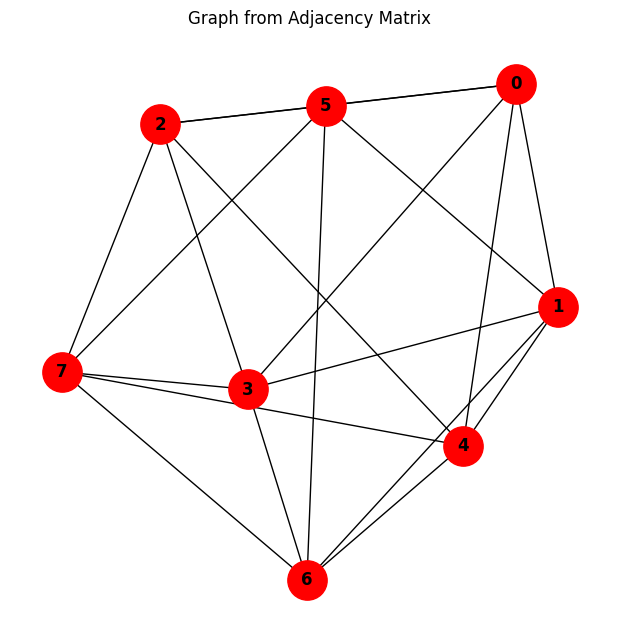

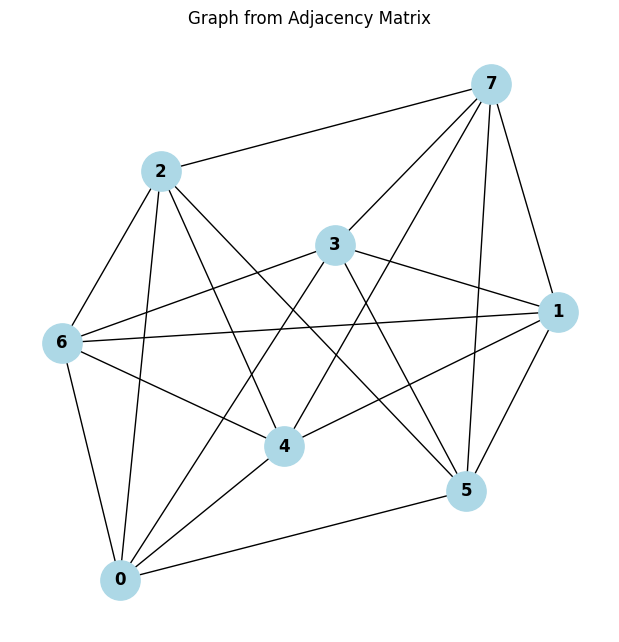

130.00000000000074


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the adjacency matrix
adj_matrix = [
    [0,1,1,1,1,1,0,0],
    [1,0,0,1,1,1,1,0],
    [1,0,0,1,1,1,0,1],
    [1,1,1,0,0,0,1,1],
    [1,1,1,0,0,0,1,1],
    [1,1,1,0,0,0,1,1],
    [0,1,0,1,1,1,0,1],
    [0,0,1,1,1,1,1,0],
]

# Create a graph from the adjacency matrix
G = nx.from_numpy_array(np.array(adj_matrix))

# Draw the graph
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color="red", node_size=800, font_weight="bold")
plt.title("Graph from Adjacency Matrix")
plt.show()
Gbar = nx.complement(G)

C8 = nx.cycle_graph(8)
C8_complement = nx.complement(C8)
plt.figure(figsize=(6, 6))
nx.draw(C8_complement, with_labels=True, node_color="lightblue", node_size=800, font_weight="bold")
plt.title("Graph from Adjacency Matrix")
plt.show()

A = nx.to_numpy_array(C8_complement)
eigs = np.linalg.eigvals(A)
print((np.sum(eigs ** 5) + (-20) * np.sum(eigs ** 3))/8)

In [ ]:
import numpy as np
import networkx as nx

# Original adjacency matrix
adj_matrix = [
    [0,1,1,1,1,1,0,0],
    [1,0,0,1,1,1,1,0],
    [1,0,0,1,1,1,0,1],
    [1,1,1,0,0,0,1,1],
    [1,1,1,0,0,0,1,1],
    [1,1,1,0,0,0,1,1],
    [0,1,0,1,1,1,0,1],
    [0,0,1,1,1,1,1,0],
]

# Create graph from adjacency matrix
G1 = nx.from_numpy_array(np.array(adj_matrix))

# Create complement of C8
C8 = nx.cycle_graph(8)
C8_complement = nx.complement(C8)

# Check isomorphism
iso = nx.is_isomorphic(G1, C8_complement)
print("Isomorphic to complement of C8:", iso)


Isomorphic to complement of C8: False


In [ ]:
k6_matrix = np.ones((6, 6), dtype=int)

# Set diagonal to 0 (no self-loops)
np.fill_diagonal(k6_matrix, 0)

# Remove a perfect matching
# In this case, we'll remove edges (0,1), (2,3), and (4,5)
k6_matrix[0, 1] = 0
k6_matrix[1, 0] = 0  # Ensure symmetry for undirected graph
k6_matrix[2, 3] = 0
k6_matrix[3, 2] = 0
k6_matrix[4, 5] = 0
k6_matrix[5, 4] = 0

eigs = np.linalg.eigvals(k6_matrix)
print(eigs)
print((np.sum(eigs ** 5) + (-20) * np.sum(eigs ** 3))/8)

[ 4.00000000e+00  2.24709371e-17 -2.00000000e+00  0.00000000e+00
 -2.00000000e+00  0.00000000e+00]
-2.842170943040401e-14
